# Sentiment Based Product Recommendation System

#### Problem Statement

Ebuss is an emerging e-commerce company that operates across multiple product categories such as household essentials, books, personal care, healthcare products, electronics, and beauty items. To compete with established market leaders like Amazon and Flipkart, Ebuss needs to enhance the quality of product recommendations shown to its users.

Currently, traditional recommendation systems rely heavily on user ratings and past purchase behavior. However, ratings alone do not capture the complete user experience, as they ignore the sentiment expressed in textual reviews.

Therefore, the objective is to design and deploy a sentiment-based product recommendation system that leverages both:

- User ratings (collaborative filtering) and

- User review sentiments (sentiment analysis)

to provide more accurate and meaningful product recommendations for existing users of the platform.

#### Project Objectives

The key objectives of this project are:

##### 1. Analyze and Preprocess Customer Review Data
- Perform exploratory data analysis (EDA)
- Clean and preprocess textual reviews
- Handle missing values and class imbalance

##### 2. Build a Sentiment Analysis Model
- Convert textual reviews into numerical features using techniques such as **TF-IDF**
- Train and evaluate multiple machine learning models:
  - Logistic Regression  
  - Random Forest  
  - XGBoost  
  - Naive Bayes
- Select the best-performing model based on evaluation metrics:
  - F1-score  
  - Recall  
  - ROC-AUC

##### 3. Develop a Recommendation System
- Implement both:
  - User-based collaborative filtering
  - Item-based collaborative filtering
- Evaluate the recommendation systems and select the most suitable one
- Generate **top 20 product recommendations** for each user based on ratings

##### 4. Improve Recommendations Using Sentiment Analysis
- Apply the trained sentiment model to the reviews of the top 20 recommended products
- Filter and rank these products
- Generate the **top 5 products with the highest positive sentiment**

##### 5. Deploy the End-to-End System
- Integrate the sentiment analysis model with the recommendation engine
- Build a **Flask-based web application**
- Deploy the application on a cloud platform (Heroku or equivalent)
- Provide a user interface where an existing username can be entered to receive recommendations

---


#### Data Flow / System Workflow

The end-to-end data flow of the sentiment-based recommendation system is as follows:

##### Data Ingestion
- Load the product reviews dataset containing:
  - User IDs (`reviews_username`)
  - Product IDs and product names
  - Ratings
  - Review text

##### Exploratory Data Analysis (EDA)
- Analyze:
  - Distribution of ratings
  - Sentiment imbalance (positive vs negative reviews)
  - Number of users and products
- Identify missing values and inconsistencies

##### Data Cleaning & Text Preprocessing
- Remove null or irrelevant columns
- Clean review text by:
  - Converting text to lowercase
  - Removing punctuation and stopwords
  - Performing lemmatization
- Prepare cleaned text for feature extraction

##### Feature Extraction
- Convert cleaned review text into numerical vectors using:
  - **TF-IDF Vectorization**
- Create input features suitable for machine learning models

##### Sentiment Analysis Model Training
- Train multiple ML models:
  - Logistic Regression
  - Random Forest
  - XGBoost
  - Naive Bayes
- Handle class imbalance using sampling techniques such as **SMOTE**
- Perform hyperparameter tuning
- Evaluate models using:
  - Accuracy
  - Precision
  - Recall
  - F1-score
  - ROC-AUC
- Select the best-performing sentiment classification model

##### Recommendation System Development
- Build collaborative filtering models:
  - User-based recommendation system
  - Item-based recommendation system
- Compare performance using **RMSE**
- Select the recommendation system with the lowest RMSE
- Generate **top 20 product recommendations** for a given user based on ratings

##### Sentiment-Based Recommendation Filtering
- For the top 20 recommended products:
  - Extract all associated user reviews
  - Predict sentiment using the trained sentiment model
  - Calculate the percentage of positive sentiment per product
- Rank products based on sentiment positivity
- Select the **top 5 products** with the highest positive sentiment

##### Model Serialization
- Save the following objects using pickle:
  - Best sentiment analysis model
  - TF-IDF vectorizer
  - Final recommendation matrix
  - Cleaned sentiment dataset

##### Deployment & User Interface
- Build backend services using **Flask**
- Create APIs to:
  - Accept username as input
  - Fetch product recommendations
- Develop a simple HTML user interface:
  - Input field for username
  - Submit button
  - Display top 5 recommended products
- Deploy the complete application on the cloud

---

#### Dataset column description

- Attribute - Attribute Description
- id - Unique identity number to identify each unique review given by the user to a particular product in the dataset
- brand - Name of the brand of the product to which user has given review and rating
- categories - Category of the product like household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products, health care products and many more.
- manufacturer - Name of the manufacturer of the product
- name - Name of the product to which user has added review or rating
- reviews_date - Date on which the review has been added by the user
- reviews_didPurchase - Whether a particular user has purchased the product or not
- reviews_doRecommend - Whether a particular user has recommended the product or not
- reviews_rating - Rating given by the user to a particular product
- reviews_text - Review given by the user to a particular product
- reviews_title - The title of the review given by the user to a particular product
- reviews_userCity - The residing city of the user
- reviews_userProvince - The residing province of the user
- reviews_username - The unique identification for individual user in the dataset
- user_sentiment - The overall sentiment of the user for a particular product (Positive or Negative)

## 1. Importing Necessary libraries

In [5]:
## import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle
from scipy.stats import loguniform

import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,confusion_matrix,classification_report,roc_auc_score,pairwise_distances
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,MinMaxScaler



from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import sys
print(sys.executable)   # should point to your .venv python
import spacy
print(spacy.__version__)
nlp = spacy.load("en_core_web_sm", disable=["parser","ner"])
print("spaCy loaded")

/usr/bin/python3
3.8.11
spaCy loaded


In [7]:
# setting max rows and columns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', 300)
pd.set_option('display.precision', 2)

## 2. Load Dataset

In [8]:
# load the dataset
#path = "D:/Sentiment_Based_Product_Recommendation/data/sample30.csv"
path = "/content/sample30.csv"
data = pd.read_csv(path)
data.head()


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


In [9]:
#check dataset shape
data.shape

(13846, 15)

In [10]:
# check dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13846 entries, 0 to 13845
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    13846 non-null  object
 1   brand                 13846 non-null  object
 2   categories            13846 non-null  object
 3   manufacturer          13846 non-null  object
 4   name                  13846 non-null  object
 5   reviews_date          13832 non-null  object
 6   reviews_didPurchase   7548 non-null   object
 7   reviews_doRecommend   13282 non-null  object
 8   reviews_rating        13846 non-null  int64 
 9   reviews_text          13846 non-null  object
 10  reviews_title         13789 non-null  object
 11  reviews_userCity      1254 non-null   object
 12  reviews_userProvince  35 non-null     object
 13  reviews_username      13803 non-null  object
 14  user_sentiment        13845 non-null  object
dtypes: int64(1), object(14)
memory usage

In [11]:
# check null values

data.isnull().sum()/len(data) * 100

,0
id,0.00e+00
brand,0.00e+00
categories,0.00e+00
manufacturer,0.00e+00
name,0.00e+00
reviews_date,1.01e-01
reviews_didPurchase,4.55e+01
reviews_doRecommend,4.07e+00
reviews_rating,0.00e+00
reviews_text,0.00e+00


In [12]:
# Dropping columns with more than 50 % null values
data = data.drop(columns=['reviews_userCity','reviews_userProvince'], axis=1)

In [13]:
# Dropping column reviews_didPurchase as it is misleading
data = data.drop(columns=['reviews_didPurchase'], axis=1)


In [14]:
# Dropping column manufacturer and reviews_data as it is not useful for our analysis
data = data.drop(columns=['manufacturer','reviews_date'], axis=1)

In [15]:
data.shape

(13846, 10)

In [16]:
# check the user sentiment row which is null and manually update it

print(data[data['user_sentiment'].isnull()]['reviews_text'].values)

# The review is Positive so we will update the user_sentiment as Positive
data['user_sentiment'] = data['user_sentiment'].fillna("Positive")

['I cannot say enough about these ']


In [17]:
# Dropping reviews_title null values as it is small in number

data = data.dropna(subset = ['reviews_title'])

In [18]:
data.shape

(13789, 10)

In [19]:
# combine reviews_title and reviews_text into a single column reviews

data['reviews_combined'] = data['reviews_text'] + " " + data['reviews_title']
data.head()

,id,brand,categories,name,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_combined
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Pink Friday: Roman Reloaded Re-Up (w/dvd),NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy. Just Awesome
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg Organic Cinnamon Toast Rice Cakes,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive,Good flavor. This review was collected as part of a promotion. Good
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg Organic Cinnamon Toast Rice Cakes,NaN,5,Good flavor.,Good,dorothy w,Positive,Good flavor. Good
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y Love Sensuality Pleasure Gel,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,rebecca,Negative,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ..."
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y Love Sensuality Pleasure Gel,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel. Irritation


## 3. Exploratory Data Analysis

In [20]:
# Mapping null usernames to "Anonymous"
data['reviews_username'] = data['reviews_username'].fillna("Anonymous")

In [21]:
# Drop columns reviews_title and reviews_text as we have combined them

data = data.drop(columns = ['reviews_title','reviews_text'], axis=1)

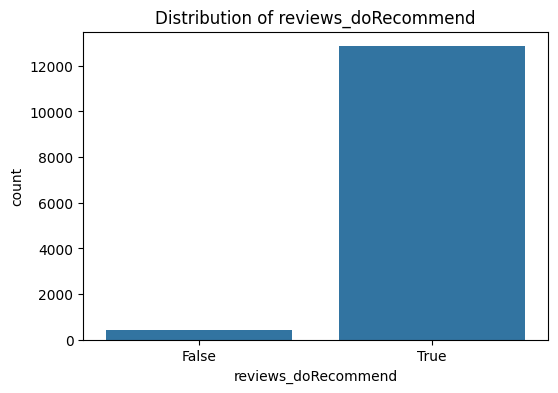

In [22]:
# checking reviews_doRecommend column

plt.figure(figsize=(6,4))
sns.countplot(data=data, x='reviews_doRecommend')
plt.title('Distribution of reviews_doRecommend')
plt.show()

-   As you can see the above data is highly biased as most of the movie recommendations are True

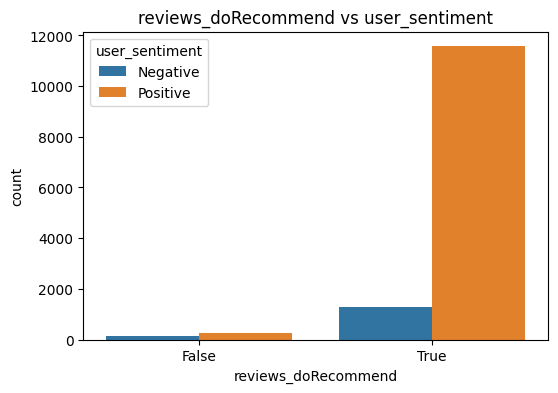

In [23]:
# checking reviews_doRecommend with user_sentiment with annotation
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='reviews_doRecommend', hue='user_sentiment')
plt.title('reviews_doRecommend vs user_sentiment')
plt.show()

- Most product recommendations that are True have positive as their sentiment.
- Dropping the column as it is highly correlated with user sentiment and provides no new information.

In [24]:
# Drop column reviews_doRecommend as it is redundant with user_sentiment

data = data.drop(columns = ['reviews_doRecommend'], axis = 1)

In [25]:
data.shape

(13789, 8)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13789 entries, 0 to 13844
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                13789 non-null  object
 1   brand             13789 non-null  object
 2   categories        13789 non-null  object
 3   name              13789 non-null  object
 4   reviews_rating    13789 non-null  int64 
 5   reviews_username  13789 non-null  object
 6   user_sentiment    13789 non-null  object
 7   reviews_combined  13789 non-null  object
dtypes: int64(1), object(7)
memory usage: 969.5+ KB


### Univariate Analysis

Text(0.5, 1.0, 'Distribution of User Sentiment')

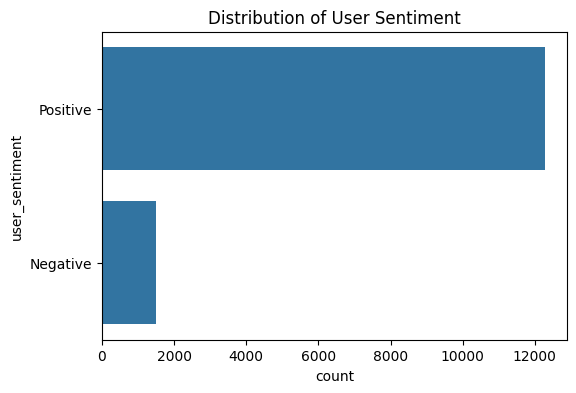

In [27]:
# Univariate Analysis of user_sentiment

plt.figure(figsize=(6,4))
sns.countplot(data=data, y='user_sentiment', order=data['user_sentiment'].value_counts().index)
plt.title('Distribution of User Sentiment')

- From the above graph, we can see there is a class imbalance which will get handled later

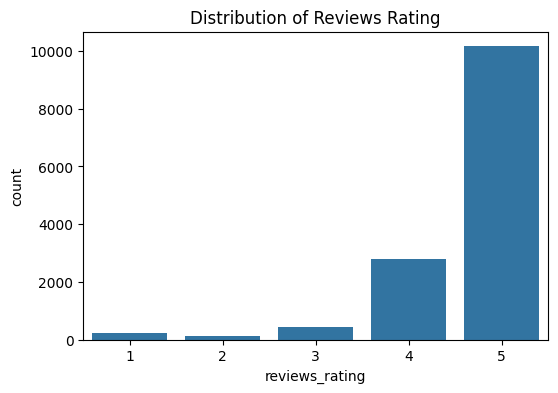

In [28]:
# Univariate  Analysis of reviews_rating

plt.figure(figsize=(6,4))
sns.countplot(data=data, x='reviews_rating', order=sorted(data['reviews_rating'].unique()))
plt.title('Distribution of Reviews Rating')
plt.show()

- Again, from the above graph, we observe that there is a class imbalance as most of the ratings are 5

### Bivariate Analysis

Text(0.5, 1.0, 'Top 5 Brands with Positive Reviews')

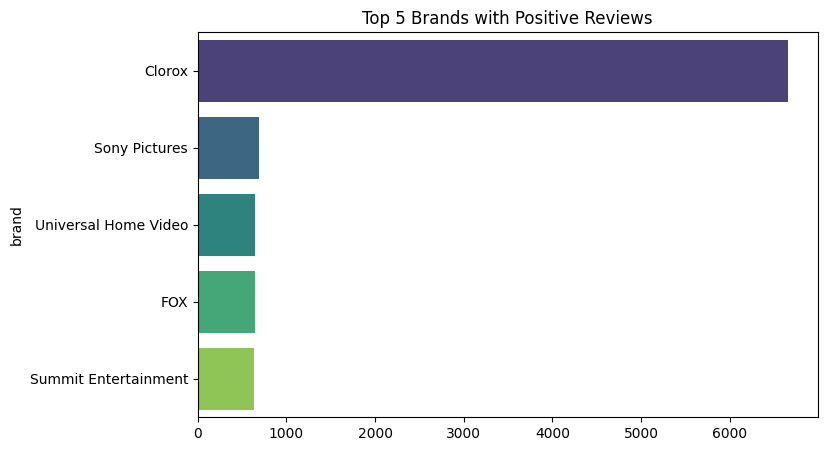

In [29]:
# plot top 5 brands with positive reviews

top_5_positive_brands = data[data['user_sentiment'] == 'Positive']['brand'].value_counts().head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_5_positive_brands.values, y=top_5_positive_brands.index, palette='viridis')
plt.title('Top 5 Brands with Positive Reviews')

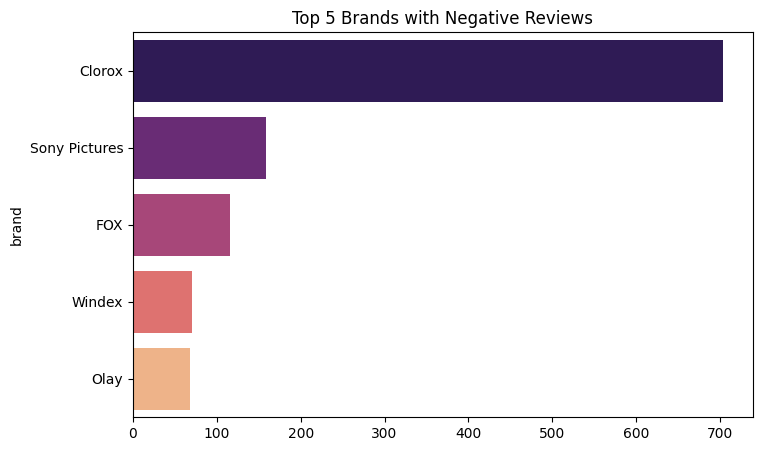

In [30]:
# top 5 brands with negative reviews
top_5_negative_brands = data[data['user_sentiment'] == 'Negative']['brand'].value_counts().head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_5_negative_brands.values, y=top_5_negative_brands.index, palette='magma')
plt.title('Top 5 Brands with Negative Reviews')
plt.show()

- Based on the above graphs, we observe that clorox brand is the highest in both positive and negative reviews

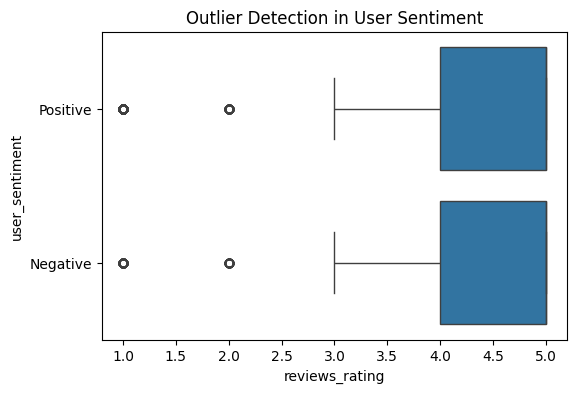

In [31]:
# checking outliers in user_sentiment column
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='reviews_rating', y='user_sentiment')
plt.title('Outlier Detection in User Sentiment')
plt.show()

- Positive sentiment

1. Ratings are heavily concentrated at the higher end (4–5).

2. Median rating is around 4+, which aligns well with positive sentiment.

3. A few outliers at very low ratings (≈1–2) exist → these are unusual cases where users gave a low rating but sentiment was marked positive (possible noise, sarcasm, or labeling error).

- Negative sentiment

1. Ratings are more spread out, ranging roughly from 1 to 5.

2. Median is around 3, not extremely low.

3. This indicates that negative sentiment is not limited to low ratings—users may give an average or even high rating but express dissatisfaction in text.

- Overlap between sentiments

1. There is a significant overlap around rating = 3–4.

2. This shows that rating alone cannot fully explain sentiment.

3. Also, user sentiment is not properly aligned with review ratings.

In [32]:
# checking user_Sentiment value counts

data['user_sentiment'].value_counts()

,count
user_sentiment,
Positive,12276
Negative,1513


In [33]:
# Detecting misclassifications where the user sentiment is Negative but the ratings is greater than 4.

clean_data = data.copy()

clean_data[(clean_data['user_sentiment'] == 'Negative') & (clean_data['reviews_rating'] >= 4)].groupby('reviews_rating').count().user_sentiment

,user_sentiment
reviews_rating,
4,303
5,981


In [34]:
# Detecting misclassifications where the user sentiment is Positive but the ratings is less than 2.

clean_data[(clean_data['user_sentiment'] == 'Positive') & (clean_data['reviews_rating'] <=2)].groupby('reviews_rating').count().user_sentiment

,user_sentiment
reviews_rating,
1,138
2,88


In [35]:
# Updating the misclassified user_sentiment values to align with reviews_rating

clean_data.loc[(clean_data['user_sentiment'] == 'Negative') & (clean_data['reviews_rating'] >= 4), 'user_sentiment'] = 'Positive'


In [36]:
# updating misclassified Positive sentiments with ratings less than or equal to 2 to Negative

clean_data.loc[(clean_data['user_sentiment'] == 'Positive') & (clean_data['reviews_rating'] <= 2), 'user_sentiment'] = 'Negative'

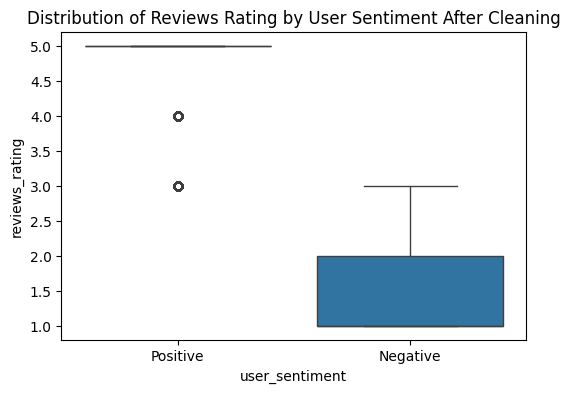

In [37]:
# checking outliers between user_sentiment and reviews_rating after cleaning

plt.figure(figsize=(6,4))
sns.boxplot(data=clean_data, x='user_sentiment', y='reviews_rating')
plt.title('Distribution of Reviews Rating by User Sentiment After Cleaning')
plt.show()

### Data Conversion

In [38]:
# In NLP, for text pre processing, we will convert the data from object to string type

all_object_columns = clean_data.select_dtypes(include=['object']).columns
clean_data[all_object_columns] = clean_data[all_object_columns].astype('string')


In [39]:
# checking information of clean_data
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13789 entries, 0 to 13844
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                13789 non-null  string
 1   brand             13789 non-null  string
 2   categories        13789 non-null  string
 3   name              13789 non-null  string
 4   reviews_rating    13789 non-null  int64 
 5   reviews_username  13789 non-null  string
 6   user_sentiment    13789 non-null  string
 7   reviews_combined  13789 non-null  string
dtypes: int64(1), string(7)
memory usage: 969.5 KB


## 4. Text Pre Processing

In [40]:
# Dropping irrelevant columns for sentiment analysis

data_prep = clean_data.copy()

data_prep = data_prep.drop(columns = ['categories'])

In [41]:
# Shape of data_prep

data_prep.shape

(13789, 7)

In [42]:
# for text pre processing, we will use only id, name, reviews_combined and user_sentiment columns

data_prep = data_prep[['id', 'name', 'reviews_combined', 'user_sentiment']]

In [43]:
# inspect the dataset

data_prep.head()

,id,name,reviews_combined,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy. Just Awesome,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part of a promotion. Good,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. Good,Positive
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Negative
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel. Irritation,Negative


### 1. Stopwords and Punctuations Removal

In [44]:
# Function to remove punctuations and convert text to lowercase

def clean_reviews(text):
    text = text.lower() # convert to lowercase
    text = re.sub(r'[^\w\s]', '', text) # remove punctuations
    return text


In [45]:
# calling the function to clean the reviews_combined column

data_prep['reviews_combined'] = data_prep['reviews_combined'].apply(clean_reviews)

# inspect the cleaned reviews
data_prep.head()

,id,name,reviews_combined,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy just awesome,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor this review was collected as part of a promotion good,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor good,Positive
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what we did notice ...,Negative
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel irritation,Negative


In [46]:
# stopwords

stopwords = set(stopwords.words('english'))

print(stopwords)


{'we', 'these', 'having', 'isn', 'now', "mustn't", "they've", 'below', 'its', 'does', 'needn', 'more', 'shouldn', 'the', 'through', 'other', 'out', 'above', "it'll", "i've", 'myself', 'once', "i'll", "she'll", 'doesn', 'you', 'own', 'were', "won't", 'by', 'ain', 'itself', 'no', 'aren', "it's", 'why', "she's", 'himself', 'all', 'and', "we'd", 'am', 'herself', 'should', 'but', 'because', 'again', 'are', 'into', "you'd", 'with', 'from', 'they', 'while', 'your', 'our', 'in', 'for', 'or', 'him', 'd', 'too', 'ours', "wouldn't", 'hasn', 'don', 'yourselves', 'those', "aren't", "hasn't", 'he', 'about', 'yourself', 'same', 'if', 'when', "i'm", 'against', 'so', 'who', 'which', 're', 'she', 'will', "don't", 'mightn', 'hadn', "he'd", 'not', "couldn't", 'any', 'theirs', 't', "shan't", 'before', "he'll", 'as', 'down', 'shan', 'such', 'couldn', 'over', "weren't", 'under', 'them', 'up', 'weren', 'until', 'few', 'did', "hadn't", "should've", 'very', 's', "we're", 'during', "they'll", 'there', "you'll", 

In [47]:
# function to remove stopwords from reviews_combined column

from nltk.tokenize import word_tokenize

def remove_stopwords(text):
  tokens = word_tokenize(text)
  filtered_tokens = [word for word in tokens if word.lower() not in stopwords]
  return ' '.join(filtered_tokens)


In [48]:
# calling the function remove_stopwords

data_prep['reviews_combined'] = data_prep['reviews_combined'].apply(remove_stopwords)

# inspect the data

data_prep.head()

,id,name,reviews_combined,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy awesome,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor review collected part promotion good,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor good,Positive
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,read reviews looking buying one couples lubricants ultimately disappointed didnt even live reviews read starters neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked capti...,Negative
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,husband bought gel us gel caused irritation felt like burning skin wouldnt recommend gel irritation,Negative


### 2. Lemmatization

In [49]:
# lemmatization of reviews_combined column using spacy

def lemmatize_reviews(text):
  doc = nlp(text)
  lemmas = ' '.join(token.lemma_ for token in doc)
  return lemmas


In [50]:
# apply lemmatization function

data_prep['reviews_lemmatized'] = data_prep['reviews_combined'].apply(lemmatize_reviews)

# inspect the data after lemmatization
data_prep.head()

,id,name,reviews_combined,user_sentiment,reviews_lemmatized
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy awesome,Positive,love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy awesome
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor review collected part promotion good,Positive,good flavor review collect part promotion good
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor good,Positive,good flavor good
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,read reviews looking buying one couples lubricants ultimately disappointed didnt even live reviews read starters neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked capti...,Negative,read review look buy one couple lubricant ultimately disappoint do not even live review read starter neither boyfriend could notice sort enhanced captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation e...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,husband bought gel us gel caused irritation felt like burning skin wouldnt recommend gel irritation,Negative,husband buy gel us gel cause irritation feel like burn skin would not recommend gel irritation


In [51]:
data_sentiment = data_prep[['id','name','reviews_lemmatized','user_sentiment']]

#inspect data_sentiment
data_sentiment.head()

,id,name,reviews_lemmatized,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy awesome,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor review collect part promotion good,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor good,Positive
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,read review look buy one couple lubricant ultimately disappoint do not even live review read starter neither boyfriend could notice sort enhanced captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation e...,Negative
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,husband buy gel us gel cause irritation feel like burn skin would not recommend gel irritation,Negative


## 5. Save model functions

In [52]:
# function to save model using pickle

import os

def save_model(obj, filepath):
  os.makedirs(os.path.dirname(filepath), exist_ok=True)

  with open(filepath, 'wb') as f:
    pickle.dump(obj, f)

  print(f"Model saved at {filepath}")


# function to load the model

def load_model(filepath):
  with open(filepath, 'rb') as f:
    obj = pickle.load(f)

  print(f"Model loaded from {filepath}")
  return obj


In [53]:
# saving the model

# save_model('data_sentiment', 'content/model/data_sentiment.pkl')

save_model('data_sentiment', 'D:/Sentiment_Based_Product_Recommendation/models/data_sentiment.pkl')
# Saving the the cleaned dataframe
pickle.dump(data_sentiment, open("D:/Sentiment_Based_Product_Recommendation/models/clean_data.pkl","wb"))

#loadmodel

# loaded_data_sentiment = load_model('content/model/data_sentiment.pkl')

#loaded_data_sentiment = load_model('models/data_sentiment.pkl')

Model saved at D:/Sentiment_Based_Product_Recommendation/models/data_sentiment.pkl


## 6. Feature Extraction using TF-IDF

TF-IDF converts textual data into numerical representations by assigning lower weights to common words and higher weights to informative, sentiment-bearing terms, thereby enhancing the effectiveness of the model.

It captures the rarity of words across all documents, allowing the model to focus on meaningful features and minimize noise from frequently occurring but less useful terms.

- max_df = 0.95: Removes words that appear in more than 95% of the documents, as such words are too frequent to provide useful information.

- min_df = 5: Retains only those words that appear in at least 5 documents, removing words thats occur less frequently

In [54]:
 # intialize tf=idf vectorizer

tfidf_vectorizer = TfidfVectorizer(
     max_df = 0.95,
     min_df = 5,
     stop_words = 'english',
     ngram_range = (1,2) # use unigrams and bigrams
 )


# applying vectorizer on lemmatized reviews

X_features = tfidf_vectorizer.fit_transform(data_sentiment['reviews_lemmatized'])

# target variable

y_labels = data_sentiment['user_sentiment']

In [55]:
# save model

#save_model(tfidf_vectorizer, 'content/model/tfidf_vectorizer.pkl')

save_model(tfidf_vectorizer, 'D:/Sentiment_Based_Product_Recommendation/models/tfidf_vectorizer.pkl')


# load the model

# load_tfidf_vectorizer = load_model('content/model/tfidf_vectorizer.pkl')
# load_tfidf_vectorizer = load_model('models/tfidf_vectorizer.pkl')

Model saved at D:/Sentiment_Based_Product_Recommendation/models/tfidf_vectorizer.pkl


In [56]:
# get the feature names

feature_names = tfidf_vectorizer.get_feature_names_out()

# compute average tf-idf scores for each feature

avg_tfidf_scores = np.asarray(X_features.mean(axis=0)).ravel()

# Create a dataframe

tfidf_data = pd.DataFrame({'Feature': feature_names, 'Avg TF-IDF Score': avg_tfidf_scores}).sort_values(by='Avg TF-IDF Score', ascending=False)

# inspect the dataframe

tfidf_data.head(10)


,Feature,Avg TF-IDF Score
2563,great,0.04
3648,love,0.04
6698,wipe,0.04
6254,use,0.04
4600,product,0.04
5131,review,0.04
1107,collect,0.04
4729,promotion,0.04
5133,review collect,0.04
1108,collect promotion,0.04


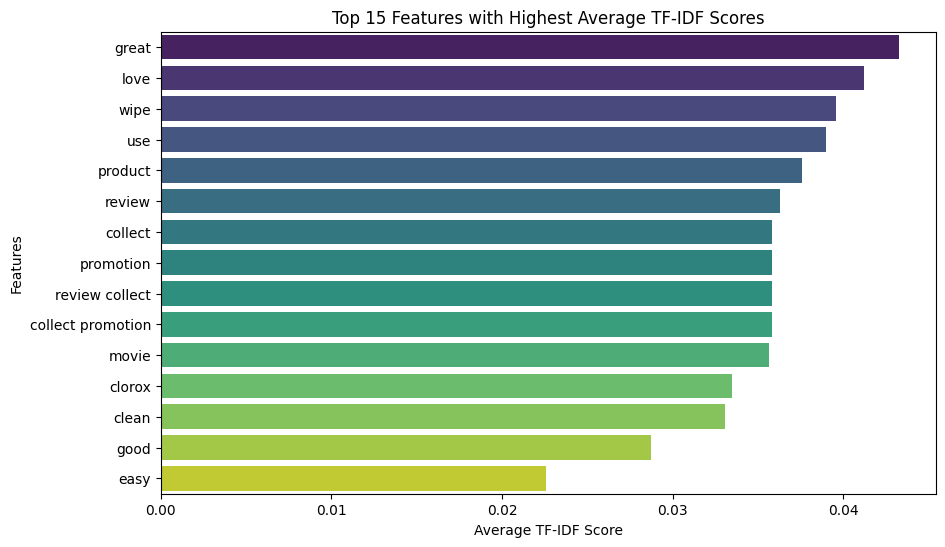

In [57]:
# plotting top 15 features

plt.figure(figsize=(10,6))
sns.barplot(data=tfidf_data.head(15), x='Avg TF-IDF Score', y='Feature', palette='viridis')
plt.title('Top 15 Features with Highest Average TF-IDF Scores')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Features')
plt.show()

### Train - Test Split

In [58]:
# splitting data into train and test datasets for model building

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, random_state = 42, test_size = 0.3)

# inspect shapes

print("X_train Shape ", X_train.shape)
print("X_test Shape ", X_test.shape)
print("y_train Shape ", y_train.shape)
print("y_test Shape ", y_test.shape)

X_train Shape  (9652, 7000)
X_test Shape  (4137, 7000)
y_train Shape  (9652,)
y_test Shape  (4137,)


### Class Imbalance

As observed earlier, the target variable user sentiment is highly imbalanced, with a significantly larger number of positive reviews compared to negative reviews. To address this class imbalance, we apply appropriate sampling techniques.

SMOTE (Synthetic Minority Over-sampling Technique) creates new synthetic samples for the minority class by generating data points between neighboring minority class instances in the feature space.

In [59]:
# user sentiment before imbalance

print(data_sentiment['user_sentiment'].value_counts(normalize= True))


user_sentiment
Positive    0.97
Negative    0.03
Name: proportion, dtype: Float64


- As observed, the dataset exhibits a significant class imbalance, with approximately 93% positive reviews and 7% negative reviews.

In [60]:
# smote is performed only on train data

smote = SMOTE(random_state = 42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [61]:
# check class balance

from collections import Counter

print("Before SMOTE", Counter(y_train))
print("\n")
print("After SMOTE", Counter(y_train_resampled))

Before SMOTE Counter({'Positive': 9343, 'Negative': 309})


After SMOTE Counter({'Positive': 9343, 'Negative': 9343})


- SMOTE creates synthetic reviews or data points based on the neigbouring reviews of minority class.

- Now, the class is balanced with same number of positive and negative reviews.

## 7. Model Building and Evaluation

We will be using 3 models
1. Logistic Regression
2. Random Forest Classifier
3. XG Boost




Evaluation Metrics
1. accuracy, precision, recall, F1 score and ROC AUC
2. display confusion matrix and ROC curves

- Accuracy : Out of all predictions, how many did the model get correct overall.
- Precision: Out of all positive predictions, how many were actually correct.
- Recall : Out of all actual positives, how many the model correctly found.
- F1 score : A balance between precision and recall
- ROC-AUC : How well the model seperates positive and negative classes across all thresholds.


In [62]:
# function for printing evaluating matrix for both train and test data

def evaluate_metrics(model, X_train, y_train, X_test, y_test):

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Probabilities (for ROC-AUC)
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Identify positive label automatically
    labels = np.unique(y_train)
    if "Positive" in labels:
        pos_label = "Positive"
        label_map = {"Negative": 0, "Positive": 1}
        y_train_bin = pd.Series(y_train).map(label_map)
        y_test_bin = pd.Series(y_test).map(label_map)
    else:
        # Assume numeric labels (0/1)
        pos_label = 1
        y_train_bin = pd.Series(y_train).astype(int)
        y_test_bin = pd.Series(y_test).astype(int)

    # ===================== TRAIN =====================
    print("TRAIN METRICS\n")
    print(f"Accuracy  : {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Precision : {precision_score(y_train, y_train_pred, pos_label=pos_label):.4f}")
    print(f"Recall    : {recall_score(y_train, y_train_pred, pos_label=pos_label):.4f}")
    print(f"F1 Score  : {f1_score(y_train, y_train_pred, pos_label=pos_label):.4f}")
    print(f"ROC AUC   : {roc_auc_score(y_train_bin, y_train_prob):.4f}")

    print("\nCLASSIFICATION REPORT")
    print(classification_report(y_train, y_train_pred))

    print("\n" + "="*60)

    # ===================== TEST =====================
    print("\nTEST METRICS\n")
    print(f"Accuracy  : {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Precision : {precision_score(y_test, y_test_pred, pos_label=pos_label):.4f}")
    print(f"Recall    : {recall_score(y_test, y_test_pred, pos_label=pos_label):.4f}")
    print(f"F1 Score  : {f1_score(y_test, y_test_pred, pos_label=pos_label):.4f}")
    print(f"ROC AUC   : {roc_auc_score(y_test_bin, y_test_prob):.4f}")

    print("\nCLASSIFICATION REPORT")
    print(classification_report(y_test, y_test_pred))

    # ================= CONFUSION MATRICES =================
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    for ax, cm, title in zip(
        [ax1, ax2],
        [cm_train, cm_test],
        ["Train Confusion Matrix", "Test Confusion Matrix"]
    ):
        ax.imshow(cm, cmap="Blues")
        ax.set_title(title)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")

        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, cm[i, j], ha="center", va="center")

    plt.show()

    # ================= ROC CURVE =================
    fpr_train, tpr_train, _ = roc_curve(y_train_bin, y_train_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test_bin, y_test_prob)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr_train, tpr_train, label="Train ROC")
    plt.plot(fpr_test, tpr_test, label="Test ROC")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


### 1. Logistic Regression

Logistic Regression is a supervised learning algorithm used for binary classification problems.

It models the log-odds of the positive class as a linear combination of input features.

The sigmoid function converts log-odds into a probability (0–1), which is then classified using a threshold.

TRAIN METRICS

Accuracy  : 0.9887
Precision : 0.9988
Recall    : 0.9786
F1 Score  : 0.9886
ROC AUC   : 0.9988

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99      9343
    Positive       1.00      0.98      0.99      9343

    accuracy                           0.99     18686
   macro avg       0.99      0.99      0.99     18686
weighted avg       0.99      0.99      0.99     18686



TEST METRICS

Accuracy  : 0.9606
Precision : 0.9883
Recall    : 0.9707
F1 Score  : 0.9794
ROC AUC   : 0.9445

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.46      0.68      0.55       146
    Positive       0.99      0.97      0.98      3991

    accuracy                           0.96      4137
   macro avg       0.72      0.83      0.77      4137
weighted avg       0.97      0.96      0.96      4137



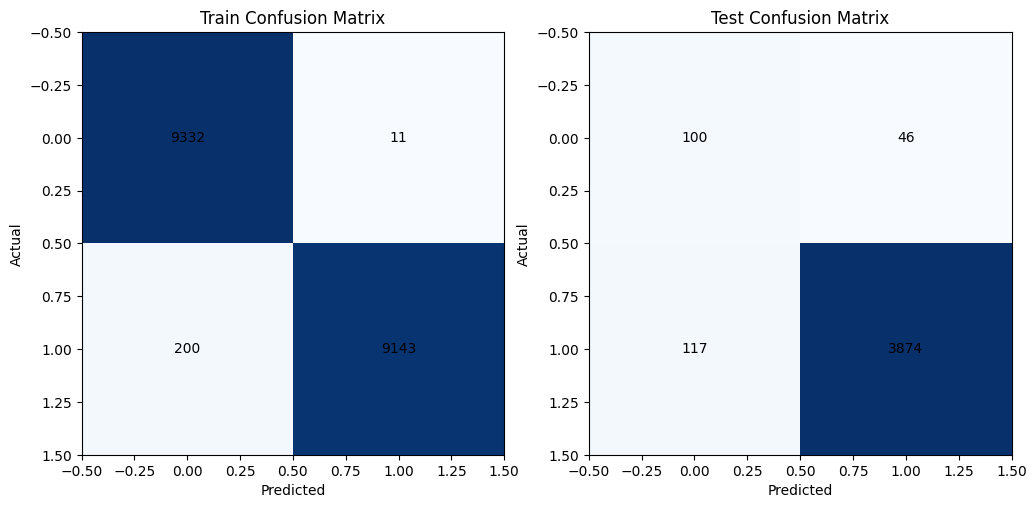

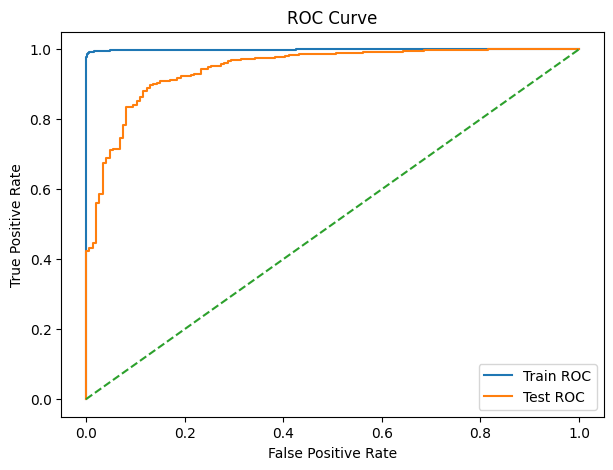

In [63]:
# logistic regression base model

logreg = LogisticRegression(
    class_weight = 'balanced',   # used for class imbalance
    random_state = 42,
    max_iter = 1000,
    solver = 'lbfgs'
)

# train the model

logreg.fit(X_train_resampled, y_train_resampled)

# evaluate performance

evaluate_metrics(logreg, X_train_resampled, y_train_resampled, X_test, y_test)


In [64]:
# save model
#save_model(logreg, 'content/model/logreg.pkl')
save_model(logreg, 'D:/Sentiment_Based_Product_Recommendation/models/logreg.pkl')

# load model
#load_logreg = load_model('content/model/logreg.pkl')
#load_logreg = load_model('D:/Sentiment_Based_Product_Recommendation/models/logreg.pkl')

Model saved at D:/Sentiment_Based_Product_Recommendation/models/logreg.pkl


#### Logistic Regression Fine Tuning

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Params
 {'C': np.float64(1.3292918943162166), 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
TRAIN METRICS

Accuracy  : 0.9908
Precision : 0.9995
Recall    : 0.9822
F1 Score  : 0.9908
ROC AUC   : 0.9991

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99      9343
    Positive       1.00      0.98      0.99      9343

    accuracy                           0.99     18686
   macro avg       0.99      0.99      0.99     18686
weighted avg       0.99      0.99      0.99     18686



TEST METRICS

Accuracy  : 0.9618
Precision : 0.9875
Recall    : 0.9727
F1 Score  : 0.9801
ROC AUC   : 0.9442

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.47      0.66      0.55       146
    Positive       0.99      0.97      0.98      3991

    accuracy                           0.96      4137
   macro

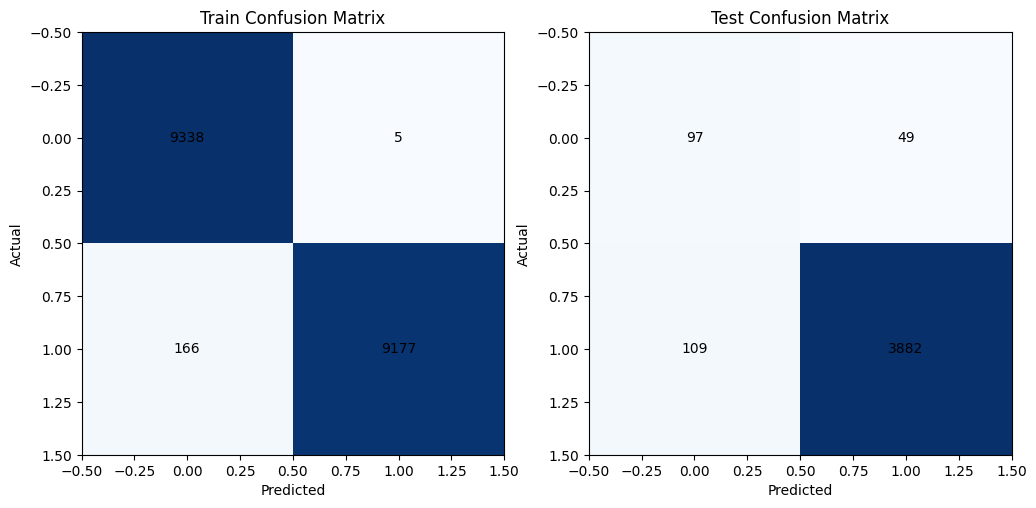

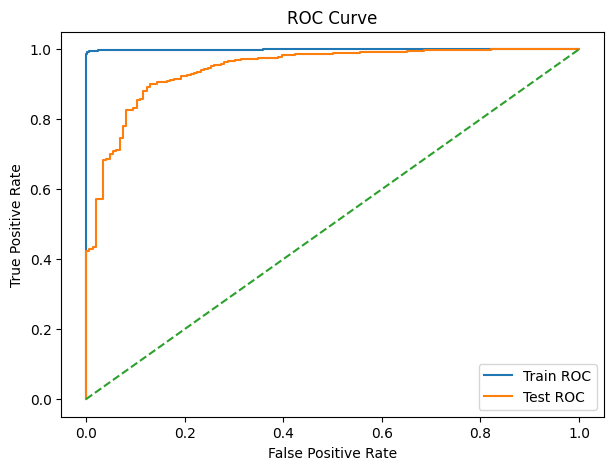

In [65]:
# hyperparameter tuning

param_grid = {
    'C': loguniform(0.1, 100),
    'penalty': ['l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced'],
}

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

base_logreg = LogisticRegression(random_state=42, n_jobs=1)

# randomized search
random_search = RandomizedSearchCV(
    estimator = base_logreg,
    param_distributions = param_grid,
    n_iter = 10,
    scoring = 'f1',
    cv = skfold,
    n_jobs = 1,
    verbose = 1,
    random_state = 42,
    refit = True,
)

# train data
random_search.fit(X_train_resampled, y_train_resampled)

#best params
print("Best Params\n",random_search.best_params_)

# evaluation

best_logreg = random_search.best_estimator_
evaluate_metrics(best_logreg, X_train_resampled, y_train_resampled, X_test, y_test)



In [66]:
# save best model

# save_model(best_logreg, 'content/model/logreg_tuned.pkl')
save_model(best_logreg, 'D:/Sentiment_Based_Product_Recommendation/models/logreg_tuned.pkl')

# load the model

#load_logreg_tuned = load_model('content/model/logreg_tuned.pkl')
#load_logreg_tuned = load_model('D:/Sentiment_Based_Product_Recommendation/models/logreg_tuned.pkl')

Model saved at D:/Sentiment_Based_Product_Recommendation/models/logreg_tuned.pkl


### 2. Random Forest

Random Forest is an ensemble learning method that builds multiple decision tree classifiers on randomly sampled data and features, and determines the final class by majority voting.

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


TRAIN METRICS

Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1 Score  : 1.0000
ROC AUC   : 1.0000

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      9343
    Positive       1.00      1.00      1.00      9343

    accuracy                           1.00     18686
   macro avg       1.00      1.00      1.00     18686
weighted avg       1.00      1.00      1.00     18686



TEST METRICS

Accuracy  : 0.9703
Precision : 0.9750
Recall    : 0.9947
F1 Score  : 0.9847
ROC AUC   : 0.9380

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.68      0.30      0.42       146
    Positive       0.97      0.99      0.98      3991

    accuracy                           0.97      4137
   macro avg       0.83      0.65      0.70      4137
weighted avg       0.96      0.97      0.96      4137



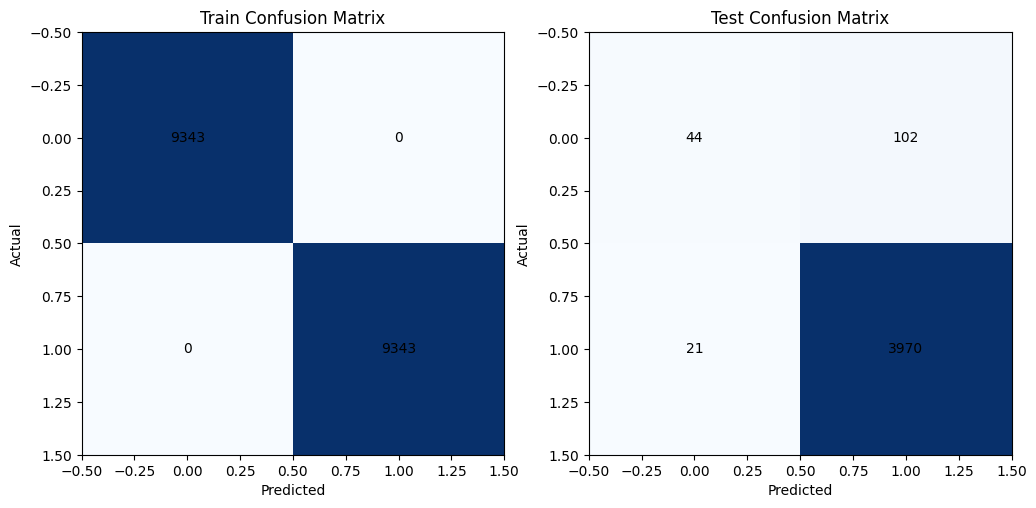

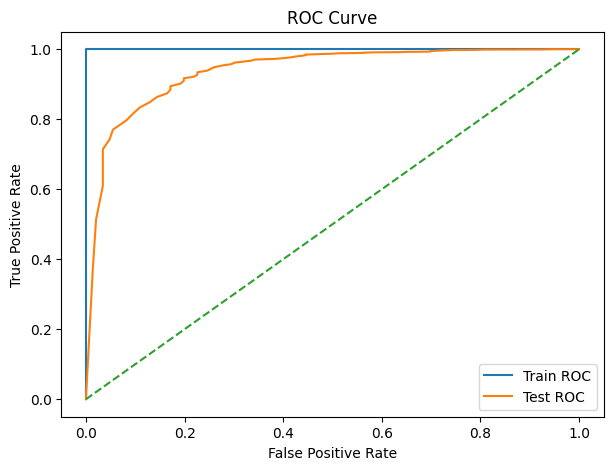

In [67]:
# building random forest model without fine tuning

rf_clf = RandomForestClassifier(
    n_estimators = 100,
    random_state = 42,
    class_weight = 'balanced',
    verbose = 1,
    n_jobs = 1
)

# Train the model
rf_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
evaluate_metrics(rf_clf, X_train_resampled, y_train_resampled, X_test, y_test)




In [68]:
# save model random forest

#save_model(rf_clf, 'content/model/rf_clf.pkl')
save_model(rf_clf, 'D:/Sentiment_Based_Product_Recommendation/models/rf_clf.pkl')

# load model random forest later

#load_rf_clf = load_model('content/model/rf_clf.pkl')
#load_rf_clf = load_model('D:/Sentiment_Based_Product_Recommendation/models/rf_clf.pkl')

Model saved at D:/Sentiment_Based_Product_Recommendation/models/rf_clf.pkl


#### Random Forest Fine Tuning

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params
 {'n_estimators': 100, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced'}
TRAIN METRICS

Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1 Score  : 1.0000
ROC AUC   : 1.0000

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      9343
    Positive       1.00      1.00      1.00      9343

    accuracy                           1.00     18686
   macro avg       1.00      1.00      1.00     18686
weighted avg       1.00      1.00      1.00     18686



TEST METRICS

Accuracy  : 0.9703
Precision : 0.9750
Recall    : 0.9947
F1 Score  : 0.9847
ROC AUC   : 0.9380

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.68      0.30      0.42       146
    Positive       0.97      0.99      0.98      3991

    accuracy                           0.97      4137

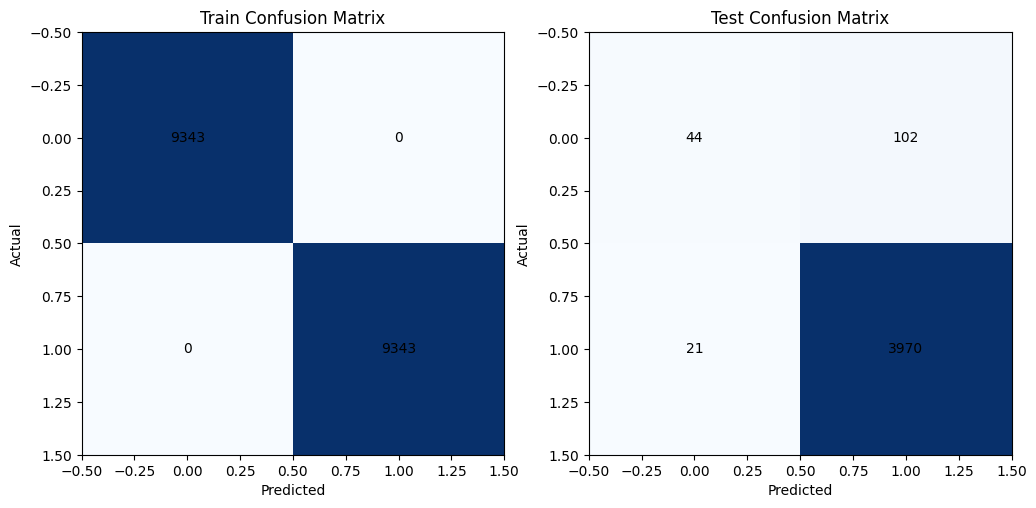

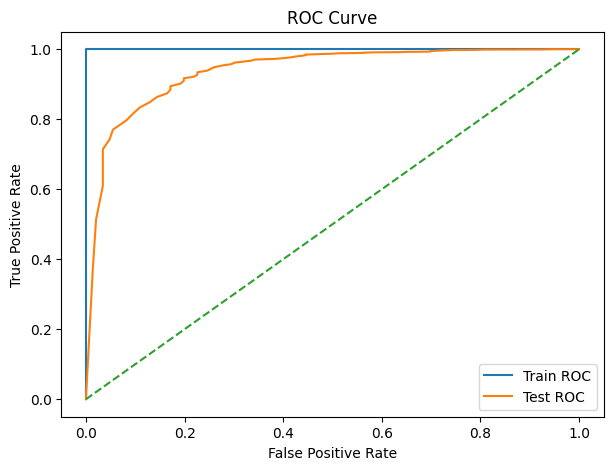

In [69]:
# Hyperparameter tuning for random forest

param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced'],
    'max_features': ['sqrt']
}

skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

base_rf = RandomForestClassifier(random_state=42, n_jobs=1)

# randomized search
random_search = RandomizedSearchCV(
    estimator = base_rf,
    param_distributions = param_grid,
    n_iter = 10,
    scoring = 'f1',
    cv = skfold,
    n_jobs = 1,
    verbose = 1,
    random_state = 42,
    refit = True,

)

random_search.fit(X_train_resampled, y_train_resampled)

best_rf = random_search.best_estimator_
print("Best Params\n",random_search.best_params_)

evaluate_metrics(best_rf, X_train_resampled, y_train_resampled, X_test, y_test)



In [70]:
# save the best random forest model

#save_model(best_rf, 'content/model/rf_clf_tuned.pkl')
save_model(best_rf, 'D:/Sentiment_Based_Product_Recommendation/models/rf_clf_tuned.pkl')

# load the best random forest model later

#load_rf_best = load_model('content/model/rf_clf_tuned.pkl')
#load_rf_best = load_model('D:/Sentiment_Based_Product_Recommendation/models/rf_clf_tuned.pkl')

Model saved at D:/Sentiment_Based_Product_Recommendation/models/rf_clf_tuned.pkl


### 3. XGBoost Classifier

XGBoost (Extreme Gradient Boosting) is a powerful ensemble learning algorithm based on gradient boosting, where multiple decision trees are built sequentially. Each new tree focuses on correcting the errors made by the previous trees, leading to high predictive accuracy and strong generalization.

XGBoost is primarily used for high-accuracy prediction tasks on structured or tabular data, such as customer churn prediction, fraud detection, and risk modeling.

It is also well-suited for handling class-imbalanced datasets through techniques such as instance weighting (scale_pos_weight) and custom loss functions, making it effective when one class dominates the data.

TRAIN METRICS

Accuracy  : 0.9808
Precision : 0.9813
Recall    : 0.9803
F1 Score  : 0.9808
ROC AUC   : 0.9981

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9343
           1       0.98      0.98      0.98      9343

    accuracy                           0.98     18686
   macro avg       0.98      0.98      0.98     18686
weighted avg       0.98      0.98      0.98     18686



TEST METRICS

Accuracy  : 0.9550
Precision : 0.9825
Recall    : 0.9707
F1 Score  : 0.9766
ROC AUC   : 0.9245

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.40      0.53      0.45       146
           1       0.98      0.97      0.98      3991

    accuracy                           0.96      4137
   macro avg       0.69      0.75      0.71      4137
weighted avg       0.96      0.96      0.96      4137



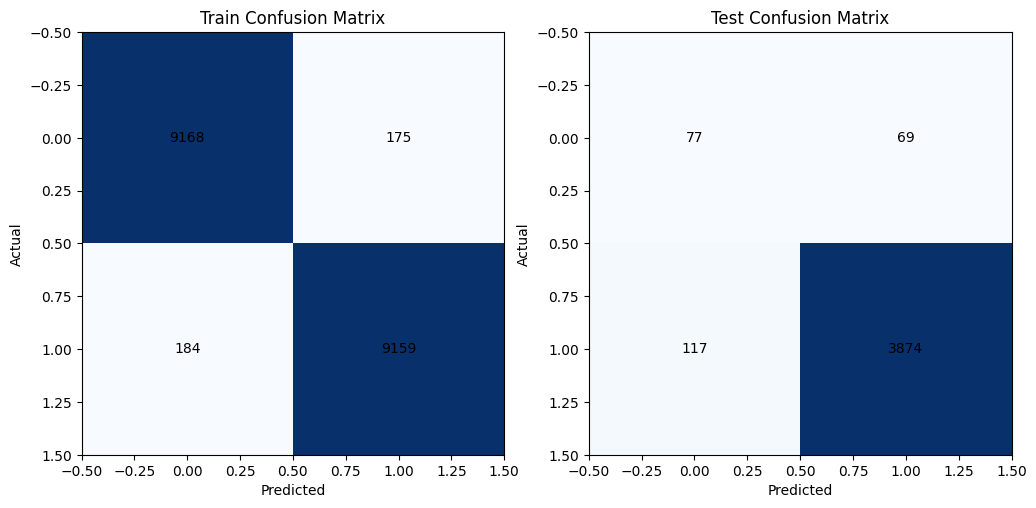

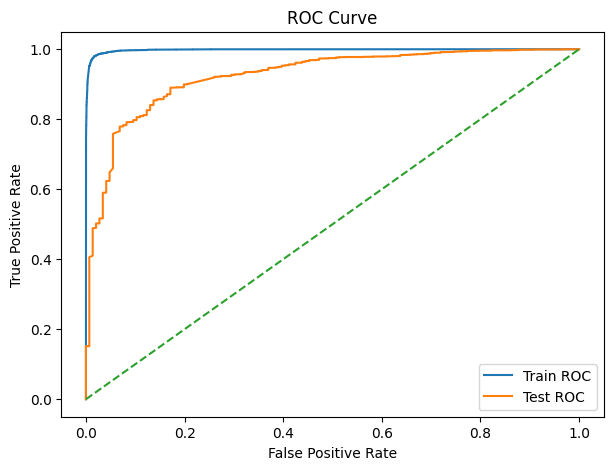

In [71]:
# encoding labels

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train_resampled)
y_test_enc = label_encoder.transform(y_test)

xg_clf = XGBClassifier(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 5,
    random_state = 42,
    scale_pos_weight = 1,
    n_jobs = 1,
    verbose = 1,
    eval_metric = 'logloss'
)


# train the model
xg_clf.fit(X_train_resampled, y_train_enc)

# evaluate the model
evaluate_metrics(xg_clf, X_train_resampled, y_train_enc, X_test, y_test_enc)


In [72]:
# save model

#save_model(xg_clf, 'content/model/xg_clf.pkl')
save_model(xg_clf, 'D:/Sentiment_Based_Product_Recommendation/models/xg_clf.pkl')

# load the model

#load_xg_clf = load_model('content/model/xg_clf.pkl')
#load_xg_clf = load_model('D:/Sentiment_Based_Product_Recommendation/models/xg_clf.pkl')


Model saved at D:/Sentiment_Based_Product_Recommendation/models/xg_clf.pkl


####  XG Boost Classifier Fine Tuning

Fitting 3 folds for each of 4 candidates, totalling 12 fits
TRAIN METRICS

Accuracy  : 0.9812
Precision : 0.9824
Recall    : 0.9800
F1 Score  : 0.9812
ROC AUC   : 0.9981

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9343
           1       0.98      0.98      0.98      9343

    accuracy                           0.98     18686
   macro avg       0.98      0.98      0.98     18686
weighted avg       0.98      0.98      0.98     18686



TEST METRICS

Accuracy  : 0.9517
Precision : 0.9824
Recall    : 0.9672
F1 Score  : 0.9747
ROC AUC   : 0.9256

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.37      0.53      0.44       146
           1       0.98      0.97      0.97      3991

    accuracy                           0.95      4137
   macro avg       0.68      0.75      0.70      4137
weighted avg       0.96      0.95      0.96      4137



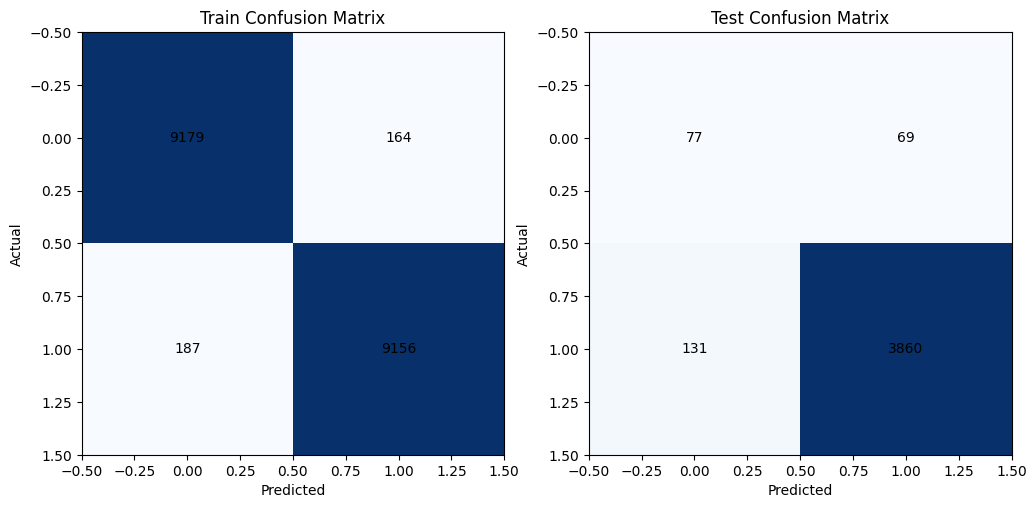

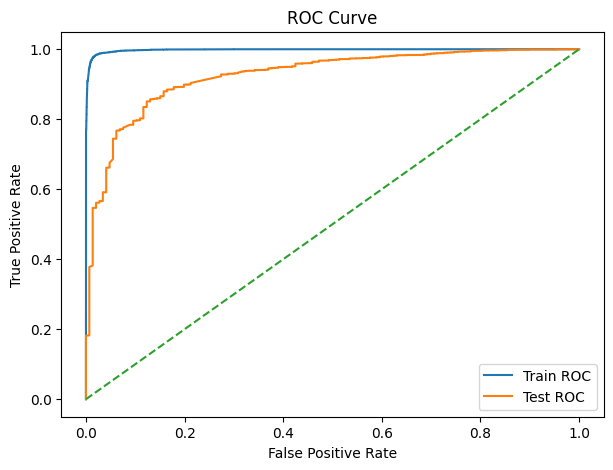

In [73]:
# hyperparameter tuning

xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    tree_method='hist',
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    n_estimators=100
)

param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    n_jobs=1,
    verbose=1
)

search.fit(X_train_resampled, y_train_enc)

best_xgb = search.best_estimator_
evaluate_metrics(best_xgb, X_train_resampled, y_train_enc, X_test, y_test_enc)




In [74]:
# save model

#save_model(best_xgb, 'content/model/xg_clf_tuned.pkl')
save_model(best_xgb, 'D:/Sentiment_Based_Product_Recommendation/models/xg_clf_tuned.pkl')

# load model

#best_xg_clf_tuned = load_model('content/model/xg_clf_tuned.pkl')
#best_xg_clf_tuned = load_model('D:/Sentiment_Based_Product_Recommendation/models/xg_clf_tuned.pkl')

Model saved at D:/Sentiment_Based_Product_Recommendation/models/xg_clf_tuned.pkl


## 8. Model Evaluation

To select the best model among Logistic Regression, Random Forest, and XGBoost, we compare their performance using evaluation metrics such as F1-score, precision, recall, ROC-AUC, and accuracy.

- We will use custom function get metrics for the evaluation and select the best model based on the metrics

In [75]:
# create a dataframe for both train and test data with base and tuned models


def get_metrics(model, X, y_true):

    # predictions
    y_pred = model.predict(X)

    # handle string labels safely
    if y_pred.dtype == object:
        label_map = {'Negative': 0, 'Positive': 1}
        y_pred = pd.Series(y_pred).map(label_map).values

    # probabilities for ROC-AUC
    y_prob = model.predict_proba(X)[:, 1]

    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_prob)
    }

results = []

models = [
    ("Logistic Regression", "Base", logreg),
    ("Logistic Regression", "Tuned", best_logreg),
    ("Random Forest", "Base", rf_clf),
    ("Random Forest", "Tuned", best_rf),
    ("XGBoost", "Base", xg_clf),
    ("XGBoost", "Tuned", best_xgb),
]

for model_name, model_type, model in models:
    train_metrics = get_metrics(model, X_train_resampled, y_train_enc)
    test_metrics = get_metrics(model, X_test, y_test_enc)

    results.append({
        "Model": model_name,
        "Type": model_type,
        "Train F1": train_metrics["F1 Score"],
        "Test F1": test_metrics["F1 Score"],
        "Train Recall": train_metrics["Recall"],
        "Test Recall": test_metrics["Recall"],
        "Train ROC-AUC": train_metrics["ROC AUC"],
        "Test ROC-AUC": test_metrics["ROC AUC"]
    })


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [76]:
# convert results to dataframe

results_df = pd.DataFrame(results)

# show data in percentages

results_df = results_df.set_index(["Model", "Type"])
results_df = results_df.applymap(lambda x: round(x * 100, 2))
results_df

Train F1  Test F1  Train Recall  Test Recall  \
Model               Type                                                  
Logistic Regression Base      98.86    97.94         97.86        97.07   
                    Tuned     99.08    98.01         98.22        97.27   
Random Forest       Base     100.00    98.47        100.00        99.47   
                    Tuned    100.00    98.47        100.00        99.47   
XGBoost             Base      98.08    97.66         98.03        97.07   
                    Tuned     98.12    97.47         98.00        96.72   

                           Train ROC-AUC  Test ROC-AUC  
Model               Type                                
Logistic Regression Base           99.88         94.45  
                    Tuned          99.91         94.42  
Random Forest       Base          100.00         93.80  
                    Tuned         100.00         93.80  
XGBoost             Base           99.81         92.45  
                    Tuned          99.81         92.56

- Based on the evaluation metrics such as F1-score, recall, and ROC-AUC, Random Forest is selected as the best-performing model.

- Although all models demonstrate strong performance, Random Forest consistently outperforms the others in terms of F1-score and recall, which are critical for the recommendation system.

- While Logistic Regression achieves a slightly higher ROC-AUC, Random Forest provides superior overall classification performance on the key metrics relevant to our objective. Hence, Random Forest is chosen as the final model.

In [77]:
#save final model

#save_model(best_rf, 'content/model/best_rf.pkl')
save_model(best_rf, 'D:/Sentiment_Based_Product_Recommendation/models/best_rf.pkl')

#load the final model

#load_final_rf = load_model('content/model/best_rf.pkl')
#load_final_rf = load_model('D:/Sentiment_Based_Product_Recommendation/models/best_rf.pkl')


Model saved at D:/Sentiment_Based_Product_Recommendation/models/best_rf.pkl


## 9. Recommendation System

Memory-based recommendation systems are of two types:

User–User Collaborative Filtering
This approach recommends items to a user based on the preferences of other users who are similar to that user.

Item–Item Collaborative Filtering
This approach recommends items based on items similar to those the user has liked or interacted with in the past.

In [78]:
# check the dataset

#path = 'D:/Sentiment_Based_Product_Recommendation/data/sample30.csv'
path = '/content/sample30.csv'
data_recommend= pd.read_csv(path)

data_recommend.shape

(30000, 15)

In [79]:
data_recommend.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive


In [80]:
# we will use selected columns for building recommendation system

data_recommend = data_recommend[['id','name','reviews_rating','reviews_username']]

data_recommend.head()

,id,name,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,rebecca
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,walker557


### 1. Handling Null Values

In [81]:
# getting total number of null values and their percentage

def check_null():
  null_count = data_recommend.isnull().sum()
  null_percentage = (data_recommend.isnull().sum() / len(data_recommend)) * 100
  null_data = pd.DataFrame({'Null Count': null_count, 'Null Percentage': null_percentage})
  null_data
  return null_data

check_null()

,Null Count,Null Percentage
id,0,0.00
name,0,0.00
reviews_rating,0,0.00
reviews_username,63,0.21


In [82]:
# dropping rows where username is null

data_recommend = data_recommend[~data_recommend.reviews_username.isna()]


In [83]:
# checking if null values are present or not
check_null()


,Null Count,Null Percentage
id,0,0.0
name,0,0.0
reviews_rating,0,0.0
reviews_username,0,0.0


### 2. Train & Test split

In [136]:
train_data, test_data = train_test_split(data_recommend, test_size=0.3, random_state=42)

# check train and test shape

print("Train shape: ", train_data.shape)
print("Test shape: ", test_data.shape)

Train shape:  (20955, 4)
Test shape:  (8982, 4)


In [137]:
test_data.head(2)

,id,name,reviews_rating,reviews_username
25787,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,ashleydale00


In [138]:
train_data.head(2)

,id,name,reviews_rating,reviews_username
962,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),5,brittney w
10463,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,cjshrad


In [139]:
# pivot the training ratings into matrix format such that rows are usernames and columns are product ids

df_pivot = train_data.pivot_table(
    index='reviews_username',
    columns = 'id',
    values = 'reviews_rating',
).fillna(0)

# check df_pivot

df_pivot.head(2)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Creating Dummy Train and Test Dataset

- Dummy train will be used to predict the ratings of the products for which the user has not provided any rating.
In dummy train, we replace non-rated (null) values with 1 and already rated products with 0, so that predictions are generated only for unseen products.

- Dummy test will be used to predict the ratings of the products for which the user has already provided ratings.
In dummy test, already rated products are marked as 1 and non-rated products are marked as 0, so that predictions are made only on rated items for evaluation purposes, where actual ratings are available.

In [140]:
#copy the train dataset

dummy_train = train_data.copy()

In [141]:
#products that are not rated by user will be marked as 1.

dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

dummy_train.head(2)

,id,name,reviews_rating,reviews_username
962,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),0,brittney w
10463,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,0,cjshrad


In [142]:
# converting the dummy train dataset into matrix format

dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

dummy_train.head(2)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 4. User Based Collaborative Filtering

##### Standard Cosine Similarity and Adjusted Cosine Similarity with analogy of movies

1. Standard Cosine Similarity
- What it is: It looks at the raw numbers you and your friend give to movies.

- The Problem: It doesn't account for "tough" vs. "easy" graders.

- If you are a tough grader, your favorite movie might get a 3/5.

- If your friend is an easy grader, their favorite movie might get a 5/5.

- The Result: Even though you both love the same movie, this method might think you are different because your numbers (3 and 5) don't match.

2. Adjusted Cosine Similarity (The "Fair" Approach)
- What it is: It adjusts the scores based on each person's "normal" rating style.

- How it works: It looks at your average score. If your average is a 2, then a 3 means "I liked this!" If your friend’s average is a 4, then a 5 also means "I liked this!"

- The Result: By focusing on whether a movie is above or below your personal average, it realizes that you and your friend actually have the same taste. It removes the "bias" of how generous or stingy you are with stars.

#### User Similarity Matrix Using Adjusted Cosine

In [143]:
# Keeping the null values since we are taking the average
#pivot train ratings dataset in which rows are usernames and columns are products

df_pivot = train_data.pivot_table(
    index='reviews_username',
    columns = 'id',
    values = 'reviews_rating'
)

#check dataset

df_pivot.head(3)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
# Normalise the product ratings for each user to be centered around 0 mean.

mean = np.nanmean(df_pivot, axis=1)

# Subtracting the mean

df_subtract = (df_pivot.T - mean).T

In [145]:
# check df_subtract

df_subtract.head(3)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Finding Cosine Similarity

In [146]:
#checking similarity between users based on their product ratings

user_similarity = 1 - pairwise_distances(df_subtract.fillna(0), metric='cosine')

#marking the similarity to 0 wherever there are null values
user_similarity[np.isnan(user_similarity)] = 0

#print user_similarity
print(user_similarity)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [147]:
# print user_similarity shape
print(user_similarity.shape)

(18275, 18275)


#### User-User Prediction

- Using cosine similarity, we aim to predict what a user might like based on the ratings or preferences of other users.
- However, we consider only those users who are positively correlated and highly similar, since they share similar preference patterns.
- Users with zero or negative similarity are ignored, as they do not contribute meaningful or reliable information for making recommendations.

In [148]:
user_similarity[user_similarity < 0] = 0

print(user_similarity)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


- The predicted rating for a user is computed as a weighted sum of ratings given by similar users, where the weights are the similarity scores between users.

In [149]:
user_predicted_ratings = np.dot(user_similarity,df_pivot.fillna(0))

#print user_predicted_ratings

print(user_predicted_ratings)

[[0.         0.         2.5        ... 1.46525748 1.88982237 0.20412415]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [150]:
user_predicted_ratings.shape

(18275, 256)

- Ignoring the products that are already rated by the user and focusing on the product's that are not rated.



In [151]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)

user_final_rating.head(2)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,2.5,3.6,0.0,0.0,0.0,0.0,2.58,1.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.15,0.0,0.0,...,0.0,2.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.62,0.0,2.5,0.0,0.0,0.65,1.67,0.19,0.0,0.0,0.0,0.0,0.0,1.47,1.89,0.2
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0


#### Finding the top 20 products a user might like using user-user based recommendation

- We have predicted the ratings that a user is likely to give to products they have not rated yet.

- Based on the ratings provided by similar users, we recommend the top 20 products that a user is most likely to like.

In [152]:
# taking sample username as input

user_input = '00sab00'


In [153]:
top_20_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]

#show product id and their cosine similarity score

df_top_20_recommendations = pd.DataFrame({'Product id':top_20_recommendations.index, 'Cosine Similarity Score':top_20_recommendations})

df_top_20_recommendations.reset_index(drop=True, inplace=True)

df_top_20_recommendations

,Product id,Cosine Similarity Score
0,AVpfPaoqLJeJML435Xk9,37.47
1,AVpfRTh1ilAPnD_xYic2,29.19
2,AVpf0eb2LJeJML43EVSt,14.26
3,AVpf3VOfilAPnD_xjpun,12.31
4,AVpf2tw1ilAPnD_xjflC,11.18
5,AVpfBrUZilAPnD_xTUly,7.83
6,AVpfov9TLJeJML43A7B0,6.62
7,AVpf385g1cnluZ0-s0_t,6.25
8,AVpfM_ytilAPnD_xXIJb,6.15
9,AVpfR5m0LJeJML436K3W,5.65


In [154]:
data_recommend.columns

Index(['id', 'name', 'reviews_rating', 'reviews_username'], dtype='object')

In [155]:
# Adding product name to the dataframe

df_top_20_rec = pd.merge(data_recommend,df_top_20_recommendations,left_on= 'id' ,right_on='Product id',how='inner')[['Product id', 'name', 'Cosine Similarity Score']].drop_duplicates()

df_top_20_rec.reset_index(drop=True, inplace=True)

df_top_20_rec.sort_values(by='Cosine Similarity Score', ascending=False)

,Product id,name,Cosine Similarity Score
16,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,37.47
19,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),29.19
2,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),14.26
6,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,12.31
4,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),11.18
9,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Coverage",7.83
15,AVpfov9TLJeJML43A7B0,Bisquick Original Pancake And Baking Mix - 40oz,6.62
5,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",6.25
11,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,6.15
18,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,5.65


#### Evaluation User-User

- Now, we will evaluate for the product that has already been rated by the user instead of the products that were not rated.

In [156]:
train_data.head(2)

,id,name,reviews_rating,reviews_username
962,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),5,brittney w
10463,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,cjshrad


In [160]:
# find common users between train and test

common_users = test_data[test_data.reviews_username.isin(train_data.reviews_username)]

# check shape
common_users.shape

(2051, 4)

In [161]:
common_users.head(2)

,id,name,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,jessica
21657,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,romance318


In [162]:
# convert into user-product matrix

common_users_matrix = common_users.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
)

common_users_matrix.head(2)


id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,...,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfi79RLJeJML43_Jo0,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
# user similarity matrix to dataframe

user_similarity_df = pd.DataFrame(user_similarity)

user_similarity_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,18250,18251,18252,18253,18254,18255,18256,18257,18258,18259,18260,18261,18262,18263,18264,18265,18266,18267,18268,18269,18270,18271,18272,18273,18274
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
# adding user id to user similarity dataframe

user_similarity_df['user_id'] = df_subtract.index

user_similarity_df.set_index('user_id', inplace=True)

user_similarity_df.head(2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,18250,18251,18252,18253,18254,18255,18256,18257,18258,18259,18260,18261,18262,18263,18264,18265,18266,18267,18268,18269,18270,18271,18272,18273,18274
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
common_users.head(2)

,id,name,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,jessica
21657,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,romance318


- This step filters the user–user similarity matrix to include only users common to both train and test datasets, ensuring valid similarity computation and correct evaluation in user-based collaborative filtering.

In [166]:
list_name = common_users.reviews_username.tolist()

user_similarity_df.columns = df_pivot.index

user_similarity_df1 = user_similarity_df[user_similarity_df.index.isin(list_name)]

print(user_similarity_df1.shape)

user_similarity_df1.head(2)

(1693, 18275)


reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123too,127726,12cass12,12gage,132457,...,zoeellasca,zoeyny,zombie,zombiedad80,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoso60,zotox,zowie,zozo0o,zpalma,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
user_similarity_df2 = user_similarity_df1.T[user_similarity_df1.T.index.isin(list_name)]

print(user_similarity_df2.shape)

user_similarity_df2.head(2)

(1693, 1693)


user_id,1234,1234567,123charlie,1943,1witch,4 rooms 1 dog lotsa fur,85lisa,a hutch,aac06002,aalyah,aaron,abcgator,abismomy,abret,ac94,acg1,acjuarez08,aclass,adam,adizzione,adma2,adriana9999,ael26,afooey,afwifey2003,...,wendy,wernigcourtney,weston t,wildchild23,wildman,willy,wimbly,wjb1,wolfie,wolverine,wonster67,woody,woowoo,wowiezowie,wren113,xavier,yamel97,yayawomack,yorkielvr,yummy,yvonne,zach,zebras,zippy,zxcsdfd
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
user_similarity_df3 = user_similarity_df2.T

user_similarity_df3.head(2)

reviews_username,1234,1234567,123charlie,1943,1witch,4 rooms 1 dog lotsa fur,85lisa,a hutch,aac06002,aalyah,aaron,abcgator,abismomy,abret,ac94,acg1,acjuarez08,aclass,adam,adizzione,adma2,adriana9999,ael26,afooey,afwifey2003,...,wendy,wernigcourtney,weston t,wildchild23,wildman,willy,wimbly,wjb1,wolfie,wolverine,wonster67,woody,woowoo,wowiezowie,wren113,xavier,yamel97,yayawomack,yorkielvr,yummy,yvonne,zach,zebras,zippy,zxcsdfd
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
user_similarity_df3[user_similarity_df3 < 0] = 0

common_user_predicted_ratings = np.dot(user_similarity_df3,common_users_matrix.fillna(0))

common_user_predicted_ratings


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [170]:
print(common_users.shape)

(2051, 4)


In [171]:
# Creating dummy test dataframe

dummy_test = common_users.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x : 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index = 'reviews_username', columns = 'id', values = 'reviews_rating').fillna(0)

print(dummy_test.shape)

dummy_test.head(2)

(1693, 140)


id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,...,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfi79RLJeJML43_Jo0,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

common_user_predicted_ratings.head(2)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,...,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfi79RLJeJML43_Jo0,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
common_user_predicted_ratings.shape

(1693, 140)

- Calculating RMSE for the products that have been rated by the user.
- Normalizing the ratings between 1 t0 5

In [174]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X = common_user_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1,5))

print(scaler.fit(X))

y = scaler.transform(X)

print(y)



MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [175]:
common_df = common_users.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating')

In [176]:
total_non_nan = np.count_nonzero(~np.isnan(y))

print(total_non_nan)

314


- Using RMSE, we can measure how much the predicted ratings differ from the actual ratings.

In [177]:
# finding rmse

rmse = sqrt(sum(sum((common_df - y )**2))/total_non_nan)

print(rmse)

2.551419404666111


- The obtained RMSE of 2.55 indicates that the predicted ratings deviate from actual ratings by approximately 2.5 points on average. Given the sparsity of the dataset and the use of a baseline user-based collaborative filtering approach, this performance is acceptable for generating top-N recommendations.

### 5. Item based Collaborative Filtering

- In item-based collaborative filtering, the rating matrix is transposed so that ratings can be normalized around the mean rating of each product. This helps remove product-specific rating bias before computing item similarity. In contrast, for user-based collaborative filtering, ratings are normalized around the mean rating of each user.

#### Item Similarity Matrix

In [178]:
df_pivot = train_data.pivot_table(
    index='reviews_username',
    columns = 'id',
    values = 'reviews_rating'
).T

df_pivot.head(2)


reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123too,127726,12cass12,12gage,132457,...,zoeellasca,zoeyny,zombie,zombiedad80,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoso60,zotox,zowie,zozo0o,zpalma,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
# Normalizing the product rating for each product

mean = np.nanmean(df_pivot, axis=1)
df_subtract = (df_pivot.T-mean).T

In [180]:
df_subtract.head(2)

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123too,127726,12cass12,12gage,132457,...,zoeellasca,zoeyny,zombie,zombiedad80,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoso60,zotox,zowie,zozo0o,zpalma,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Finding Cosine Similarity

In [181]:
# finding cosine similarity using pairwise distance

cosine_similarity_items = 1 - pairwise_distances(df_subtract.fillna(0), metric='cosine')

cosine_similarity_items[np.isnan(cosine_similarity_items)] = 0

print(cosine_similarity_items)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [182]:
# Filtering only the positive correlations

cosine_similarity_items[cosine_similarity_items < 0] = 0

cosine_similarity_items


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### Item - Item Prediction

In [183]:
item_predicted_ratings = np.dot(df_pivot.fillna(0).T,cosine_similarity_items)

item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00603917, 0.06485571,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0094556 ],
       [0.        , 0.        , 0.        , ..., 0.00781596, 0.10809285,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00756448]])

In [184]:
print(item_predicted_ratings.shape)

print(dummy_train.shape)


(18275, 256)
(18275, 256)


- Filtering ratings for the products that have been not rated by the users.

In [185]:
item_final_ratings = np.multiply(item_predicted_ratings,dummy_train)

item_final_ratings.head(2)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,6.04e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,8.18e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.02,5.14e-03,0.0,0.00e+00,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.02,6.04e-03,0.06,0.0
01impala,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.05e-04,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.10e-03,0.0,...,0.0,2.99e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.92e-03,0.0,5.30e-03,0.0,0.0,0.00,0.0,0.1,0.0,0.0,0.0,0.0,0.00,0.00e+00,0.00,0.0


#### Finding the top 20 Items that a user might like and purchase based on ratings

In [186]:
# sample user input

user_input = '00sab00'


In [187]:
top_20_item_recommendations = item_final_ratings.loc[user_input].sort_values(ascending=False)[0:20]

df_top_20_item_recommendations = pd.DataFrame({'Product id':top_20_item_recommendations.index, 'Cosine Similarity Score':top_20_item_recommendations})

df_top_20_item_recommendations.reset_index(drop=True, inplace=True)

df_top_20_item_recommendations

,Product id,Cosine Similarity Score
0,AVpfE7puilAPnD_xUcCW,0.15
1,AVpfv4TlilAPnD_xhjNS,0.06
2,AVpfJcHuLJeJML433ZrY,0.05
3,AVpf0thK1cnluZ0-r8vR,0.04
4,AVpe6PCDLJeJML43yFQH,0.03
5,AVpe_dxlilAPnD_xSiHI,0.03
6,AVpfQtEm1cnluZ0-hUpe,0.03
7,AVpfHf4wLJeJML432vqK,0.02
8,AVpfthSailAPnD_xg3ON,0.02
9,AVpe6FfKilAPnD_xQmHi,0.02


In [188]:
# adding product name

top_20_item_recommendations = pd.merge(data_recommend,df_top_20_item_recommendations,left_on= 'id' ,right_on='Product id', how='inner')[['Product id', 'name', 'Cosine Similarity Score']].drop_duplicates()

top_20_item_recommendations.reset_index(drop=True, inplace=True)

top_20_item_recommendations.sort_values(by='Cosine Similarity Score', ascending=False)

,Product id,name,Cosine Similarity Score
11,AVpfE7puilAPnD_xUcCW,Bilbao Nightstand Gray Oak - South Shore,0.15
19,AVpfv4TlilAPnD_xhjNS,Various - Red Hot Blue:Tribute To Cole Porter (cd),0.06
13,AVpfJcHuLJeJML433ZrY,Equals (blu-Ray),0.05
8,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (blu-Ray),0.04
6,AVpe6PCDLJeJML43yFQH,Wagan Smartac 80watt Inverter With Usb,0.03
0,AVpe_dxlilAPnD_xSiHI,"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",0.03
17,AVpfQtEm1cnluZ0-hUpe,Jolly Time Select Premium Yellow Pop Corn,0.03
12,AVpfHf4wLJeJML432vqK,Trend Lab Park Nursing Cover - Paisley,0.02
18,AVpfthSailAPnD_xg3ON,"Musselman Apple Sauce, Cinnamon, 48oz",0.02
4,AVpe6FfKilAPnD_xQmHi,Chex Muddy Buddies Brownie Supreme Snack Mix,0.02


#### Evaluation Item-Item

- In item-based collaborative filtering, evaluation is performed by predicting ratings for already rated items and comparing them with actual ratings, while recommendation is done for unrated items.

In [189]:
# common products of test and train dataset

common_items = test_data[test_data.id.isin(train_data.id)]
common_items.shape

(8966, 4)

In [ ]:
common_items.head(2)

In [190]:
common_item_based_matrix = common_items.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating').T

common_item_based_matrix.shape

(195, 8318)

In [191]:
# creating item similarity data frame

item_similarity_df = pd.DataFrame(cosine_similarity_items)

item_similarity_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
item_similarity_df['item_id'] = df_subtract.index

item_similarity_df.set_index('item_id',inplace=True)

item_similarity_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
item_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
list_name = common_items.id.tolist()

item_similarity_df.columns = df_subtract.index.tolist()

item_similarity_df1 = item_similarity_df[item_similarity_df.index.isin(list_name)]

print(item_similarity_df1.shape)

(195, 256)


In [194]:
item_similarity_df2 = item_similarity_df1.T[item_similarity_df1.T.index.isin(list_name)]

print(item_similarity_df2.shape)


(195, 195)


In [195]:
item_similarity_df3 = item_similarity_df2.T

item_similarity_df3.head(2)

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-M4-ilAPnD_xSF1K,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,...,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
item_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.47e-03,0.0,0.0,0.0,0.0,0.0,2.10e-03,0.0,0.0,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
# we only want positively correlated items

item_similarity_df3[item_similarity_df3 < 0] = 0

common_item_predicted_ratings = np.dot(item_similarity_df3,common_item_based_matrix.fillna(0))

common_item_predicted_ratings

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.34691174e-02, 3.00000000e+00, 6.62104097e-03, ...,
        0.00000000e+00, 5.16904870e-03, 8.22214474e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.45559849e-03]])

In [197]:
common_item_predicted_ratings.shape

(195, 8318)

In [198]:
# using dummy test for evaluation

dummy_test = common_items.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x : 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index = 'reviews_username', columns = 'id', values = 'reviews_rating').T.fillna(0)

print(dummy_test.shape)

(195, 8318)


In [199]:
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

# items that are not rated are marked as 0 for evaluation

common_df = common_items.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating').T




In [200]:
from sklearn.preprocessing import MinMaxScaler

from numpy import *

X = common_item_predicted_ratings.copy()

X = X[X>0]

scaler = MinMaxScaler(feature_range=(1,5))

print(scaler.fit(X))

y = scaler.transform(X)

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [201]:
# finding total nan values

total_non_nan = np.count_nonzero(~np.isnan(y))

print(total_non_nan)


8673


- RMSE for item-item based recommendation

In [202]:
# finding rmse

rmse_item = (sum(sum((common_df - y )**2))/total_non_nan)**0.5

print(rmse_item)

3.549394406370927


### 6. Best Recommendation Model

- The best recommendation model is selected by comparing the performance of user-based and item-based collaborative filtering using Root Mean Square Error (RMSE).

- The recommendation model with the lowest RMSE is chosen, as it indicates more accurate rating predictions.

In [203]:
# best recommendation model

if rmse < rmse_item:
    print('Best Model is User-User Based Recommendation Model')
else:
    print('Best Model is Item-Item Based Recommendation Model')

Best Model is User-User Based Recommendation Model


### 10. Top 20 Product Recommendations using User-User based Recommendation Model

In [204]:
# user input

user_input = 'evrydayhustla420'

In [205]:
top_20_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]

df_top_20_recommendations = pd.DataFrame({'Product id':top_20_recommendations.index, 'Cosine Similarity Score':top_20_recommendations})

df_top_20_recommendations = df_top_20_recommendations.reset_index(drop=True)

df_top_20_recommendations



,Product id,Cosine Similarity Score
0,AVpfRTh1ilAPnD_xYic2,16.87
1,AVpe41TqilAPnD_xQH3d,13.02
2,AVpf0eb2LJeJML43EVSt,11.84
3,AVpf3VOfilAPnD_xjpun,9.61
4,AVpe59io1cnluZ0-ZgDU,7.71
5,AVpfJP1C1cnluZ0-e3Xy,5.47
6,AVpfOIrkilAPnD_xXgDG,4.81
7,AVpfPnrU1cnluZ0-g9rL,4.54
8,AVpe31o71cnluZ0-YrSD,4.34
9,AVpe8gsILJeJML43y6Ed,4.31


In [206]:
# adding product name

top_20_recommendations = pd.merge(data_recommend,df_top_20_recommendations,left_on= 'id' ,right_on='Product id',how='inner')[['Product id', 'name', 'Cosine Similarity Score']].drop_duplicates()

top_20_recommendations.reset_index(drop=True, inplace=True)

top_20_recommendations.sort_values(by='Cosine Similarity Score', ascending=False)


,Product id,name,Cosine Similarity Score
18,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),16.87
1,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),13.02
5,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),11.84
8,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,9.61
2,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),7.71
12,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5.47
15,AVpfOIrkilAPnD_xXgDG,Alex Cross (dvdvideo),4.81
17,AVpfPnrU1cnluZ0-g9rL,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),4.54
0,AVpe31o71cnluZ0-YrSD,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),4.34
3,AVpe8gsILJeJML43y6Ed,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",4.31


In [207]:
print(user_final_rating.shape)

(18275, 256)


In [208]:
# save recommendation model

#save_model(user_final_rating.astype('float'),'content/model/final_recommendation_model.pkl')
save_model(user_final_rating.astype('float'),'D:/Sentiment_Based_Product_Recommendation/models/final_recommendation_model.pkl')

# load model

#load_final_recommendation_model = load_model('content/model/final_recommendation_model.pkl')
#load_final_recommendation_model = load_model('D:/Sentiment_Based_Product_Recommendation/models/final_recommendation_model.pkl')



Model saved at D:/Sentiment_Based_Product_Recommendation/models/final_recommendation_model.pkl


### 10. Fine Tuning Recommendation Model and Top 20 Products

In [209]:
# loading models

with open('D:/Sentiment_Based_Product_Recommendation/models/tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

with open('D:/Sentiment_Based_Product_Recommendation/models/best_rf.pkl', 'rb') as f:
    best_classifier_sentiment_model = pickle.load(f)

# Create function for recommending top 5 products

def recommend_products_user(user_name):
  if user_name not in user_final_rating.index:
    print(f"This user {user_name} does not exist. Kindly provide a valid user name")
    return None
  else:
    # top 20 recommended products
    top_20_recommended_products = list(user_final_rating.loc[user_name].sort_values(ascending = False)[0:20].index)

    # filter for 20 products
    df_top_20_products = data_sentiment[data_sentiment['id'].isin(top_20_recommended_products)]

    # Transform reviews using TF-IDF

    X = tfidf_vectorizer.transform(df_top_20_products['reviews_lemmatized'].values.astype(str))

    # Predict sentiment

    df_top_20_products['predicted_sentiment'] = best_classifier_sentiment_model.predict(X)

    # Map positive sentiment to 1, negative to 0

    df_top_20_products['positive_sentiment'] = df_top_20_products['predicted_sentiment'].apply(lambda x : 1 if x == 'Positive' else 0)

    # Aggregate positive counts

    pred_df = df_top_20_products.groupby('name')['positive_sentiment'].sum().to_frame('positive_sentiment_count')

    # Total review count

    pred_df['total_sent_count'] = df_top_20_products.groupby('name')['predicted_sentiment'].count()

    # Positive Sentiment in %

    pred_df['positive_sentiment_percentage'] = np.round(pred_df['positive_sentiment_count']/pred_df['total_sent_count']*100,2)

    # Top 5 products

    top_5_products = pred_df.sort_values(by='positive_sentiment_percentage', ascending=False)[0:5]

    return top_5_products




### 11. Top 5 Product Recommendations

In [210]:
# Taking user input

user_input = '00sab00'


print(f"Printing the top 5 recommended products for the user: {user_input} "
        f"along with each product's positive sentiment count, "
        f"overall review count, and positive sentiment %\n")

# top 5 recommended products with sentiment details
top5_reco_sent_user = recommend_products_user(user_input)

# product names for the top 5 recommendations
print(f"Printing the top 5 recommended products list for the user: {user_input}")
print(list(top5_reco_sent_user.index))

# dataframe
top5_reco_sent_user




Printing the top 5 recommended products for the user: 00sab00 along with each product's positive sentiment count, overall review count, and positive sentiment %

Printing the top 5 recommended products list for the user: 00sab00
['Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total', 'Red (special Edition) (dvdvideo)', 'The Resident Evil Collection 5 Discs (blu-Ray)', '100:Complete First Season (blu-Ray)', 'Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack']


,positive_sentiment_count,total_sent_count,positive_sentiment_percentage
name,,,
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,7336,7365,99.61
Red (special Edition) (dvdvideo),668,672,99.40
The Resident Evil Collection 5 Discs (blu-Ray),835,845,98.82
100:Complete First Season (blu-Ray),135,139,97.12
"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",296,310,95.48


In [211]:
# Taking another user input

user_input2 = 'wonderwoman'

print(f"Printing the top 5 recommended products for the user: {user_input2} "
        f"along with each product's positive sentiment count, "
        f"overall review count, and positive sentiment %\n")

# top 5 recommended products with sentiment details
top5_reco_sent_user = recommend_products_user(user_input2)

# product names for the top 5 recommendations
print(f"Printing the top 5 recommended products list for the user: {user_input2}")
print(list(top5_reco_sent_user.index))

# dataframe
top5_reco_sent_user





Printing the top 5 recommended products for the user: wonderwoman along with each product's positive sentiment count, overall review count, and positive sentiment %

Printing the top 5 recommended products list for the user: wonderwoman
['Bi-O-kleen Spray & Wipe All Purpose Cleaner', 'Stander Pt Bedcane - Bed Handle', 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total', 'Red (special Edition) (dvdvideo)', 'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)']


,positive_sentiment_count,total_sent_count,positive_sentiment_percentage
name,,,
Bi-O-kleen Spray & Wipe All Purpose Cleaner,2,2,100.00
Stander Pt Bedcane - Bed Handle,13,13,100.00
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,7336,7365,99.61
Red (special Edition) (dvdvideo),668,672,99.40
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),651,668,97.46


In [212]:
user_input3 = 'charlie'

print(f"Printing the top 5 recommended products for the user: {user_input3} "
        f"along with each product's positive sentiment count, "
        f"overall review count, and positive sentiment %\n")

# top 5 recommended products with sentiment details
top5_reco_sent_user = recommend_products_user(user_input3)

# product names for the top 5 recommendations
print(f"Printing the top 5 recommended products list for the user: {user_input3}")
print(list(top5_reco_sent_user.index))

# dataframe
top5_reco_sent_user

Printing the top 5 recommended products for the user: charlie along with each product's positive sentiment count, overall review count, and positive sentiment %

Printing the top 5 recommended products list for the user: charlie
["Cars Toon: Mater's Tall Tales", 'Eagle Fat Free Sweetened Condensed Milk', 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total', 'The Resident Evil Collection 5 Discs (blu-Ray)', '100:Complete First Season (blu-Ray)']


,positive_sentiment_count,total_sent_count,positive_sentiment_percentage
name,,,
Cars Toon: Mater's Tall Tales,34,34,100.00
Eagle Fat Free Sweetened Condensed Milk,15,15,100.00
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,7336,7365,99.61
The Resident Evil Collection 5 Discs (blu-Ray),835,845,98.82
100:Complete First Season (blu-Ray),135,139,97.12


- Dummy users to check the recommendations

In [213]:
from psutil import users
# show review usernames where there are prodducts with ratings greater than 0 using final_product_ratings

users_with_ratings = user_final_rating[
    (user_final_rating > 0).any(axis=1)
].index

users_with_ratings


Index(['00sab00', 'abbey', 'abby', 'adam', 'aimee', 'alex', 'amber', 'ammi',
       'amy1', 'andrea',
       ...
       'whome', 'windowkitty', 'winniepoo2', 'wizard', 'wonderwoman', 'worm',
       'wvshopaholic', 'xavier', 'zitro', 'zmom'],
      dtype='object', name='reviews_username', length=361)

In [216]:
# print random users from users_with_ratings

for i,user in enumerate(users_with_ratings):
  print(i,user)

0 00sab00
1 abbey
2 abby
3 adam
4 aimee
5 alex
6 amber
7 ammi
8 amy1
9 andrea
10 andy
11 angel
12 angela
13 angie
14 annie
15 anthony
16 april
17 ashley
18 awesome
19 ayterrazas
20 bailee
21 baker
22 barb
23 batmanny
24 bb
25 bblack
26 bean
27 bella
28 bestbuyer
29 betty
30 bigb
31 bigd
32 bigdog
33 bill
34 blondie
35 bobbi
36 bobo
37 brad
38 brandon
39 brandy
40 breezy
41 brian
42 brooke
43 btechthor
44 bubba
45 bucket
46 byamazon customer
47 cami
48 caroline
49 carrie
50 cass
51 cassie
52 champ
53 char
54 charles
55 charlie
56 chas
57 cheryl
58 chris
59 chrissy
60 christina
61 chuck
62 chucky
63 cindy
64 cleo
65 cookiemonster
66 cool
67 coronadad
68 cougar
69 court
70 cowboy
71 dani
72 danielle
73 danl
74 danny
75 darcy
76 daredevil
77 darkoniv
78 dave
79 david
80 daysi
81 deb
82 debb
83 debc
84 debd
85 debi
86 deda
87 denise
88 dennis
89 diane
90 disappointed
91 djx1977
92 donna
93 dora
94 doreen
95 drabo
96 drew
97 eddie
98 elizabeth
99 emerald
100 emily
101 eric
102 erin
103 evryd

### 12. Final Conclusion

This project successfully implements an end-to-end sentiment-based product recommendation system. The workflow covers exploratory data analysis and preprocessing, TF-IDF–based feature extraction, training and selecting an optimal sentiment classification model, and building a collaborative filtering recommendation engine. For each user, the system first generates the top 20 product recommendations based on collaborative filtering and then re-ranks and filters them using predicted review sentiment to produce the final top 5 recommendations.

The complete pipeline is validated and integrated into a Flask-based web application, with all trained models and artifacts serialized for deployment. Overall, the solution is robust, scalable, and ready for real-world deployment in an e-commerce setting.



### 13. Key Takeaways

- Data characteristics: The dataset exhibits class imbalance, with a strong skew toward positive (5-star) ratings and sentiments, requiring careful handling during model training.

- Text preprocessing: Review text was effectively cleaned, lemmatized, and transformed into numerical features using TF-IDF, enabling efficient sentiment modeling.

- Model selection: Multiple sentiment classification models were trained and evaluated, and the best-performing model was selected using standard metrics such as F1-score, recall, and ROC-AUC.

- Hybrid recommendation approach: Collaborative filtering was used to generate candidate recommendations, while sentiment predictions were leveraged to refine and rank results, improving recommendation quality.

- Deployment readiness: The system is fully deployable, with a Flask interface, serialized model artifacts, and necessary deployment configurations (e.g., Procfile and gunicorn support).

### 13. Flask Application UI Demo Photos

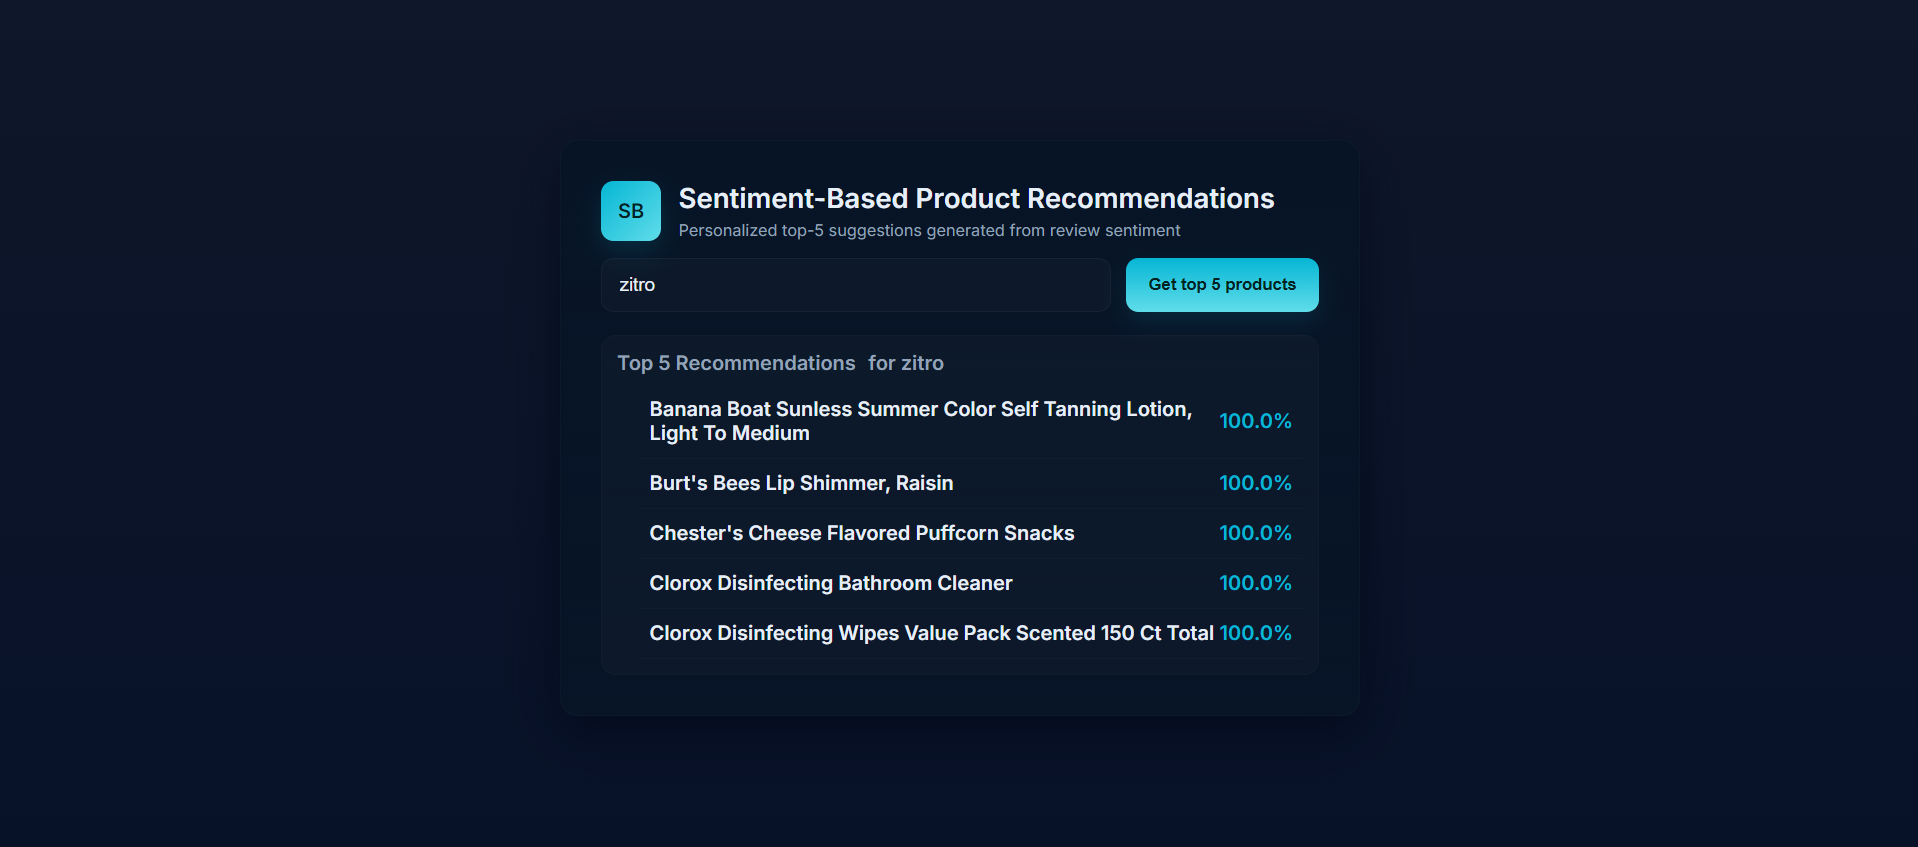

### 14. Flask App Link - Deployed Using Render

- Render Link - https://sentiment-based-product-recommendation-lo2n.onrender.com/

Note - The app is deployed on render, so if there is inacitivity it goes on sleep, to activate it will take around 30 secs.

- Github Link - https://github.com/Zheelncodeeasy/Sentiment_Based_Product_Recommendation_System